# K MEAN DIGIT CLASSIFICATION

Your code should be submitted separately from the final writeup.  This can be in a Jupyter notebook or a text editor of your course.

* Code should be fully commented. This can be in markdown cells describing the algorithm, or simply in standard comments.
* Any relevant citations for outside resources used MUST BE PRESENT. Your code will be run through anti-plagiarism software.
* Clearly note any algorithms used. If your code differs from conventions used in class, make note of that in comments.
* In this submission, you will be evaluated for whether or not your project’s content included a rigorous implementation of CSCI4022 techniques. * If you choose to use default packages instead of variants of the code from in class, you must clearly comment in and describe why you are using that package, and how its implementation compares to in-class variants.
* Submission may be .ipynb or text files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
# Load the MNIST dataset from mnist.npz file
with np.load('../data/mnist.npz') as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
# x_train[0], y_train[0]

## Plot digits

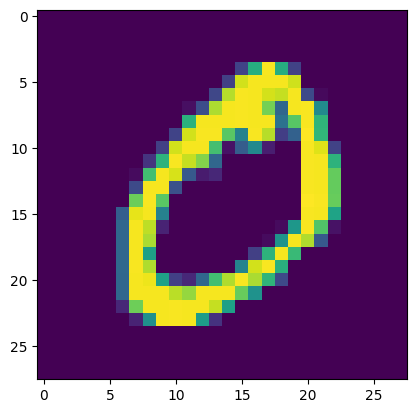

In [5]:
plt.imshow(x_train[1])

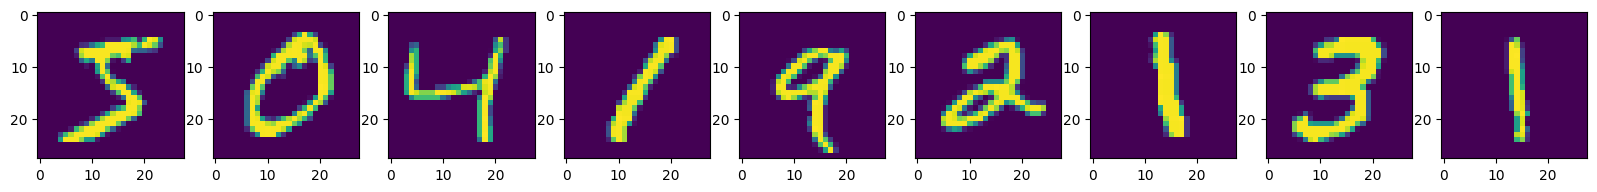

In [6]:
plt.figure(figsize = (20,9)) 

# plot first 9 datapoints from MNIST
for i in range(9):
 plt.subplot(1,9,i+1)
 plt.imshow(x_train[i])

## Preprocess Data

flatten all datapoints from (28x28) --> (784x1) and normalize

In [7]:
# flatten from 28x28 --> 784x1
x_train = x_train.reshape(len(x_train),-1)
x_test = x_test.reshape(len(x_test),-1)
print(x_train.shape)

(60000, 784)


In [8]:
# normalize
x_train = x_train / 255.0
np.min(x_train), np.max(x_train)

(0.0, 1.0)

In [9]:
# plt.figure(figsize = (20,9)) 

# # plot first 9 datapoints from MNIST
# for i in range(9):
#  plt.subplot(1,9,i+1)
#  plt.imshow(x_train[i].reshape((28,28)))

# K-Means

## Random Initialization

We can try different distance measures like L1, L2,L∞

Also do a plot to find best value of K and see if it is actually the most digit-like centroid

In [21]:
# kmeans
def l2_dist(x1,x2):
    distance = np.sqrt(np.sum((np.array(x1) - np.array(x2))**2))
    return distance

def l1_dist(x1,x2):
    distance = np.sum(abs(np.array(x1) - np.array(x2)))
    return distance

def linf_dist(x1,x2):
    distance = np.max(abs(np.array(x1) - np.array(x2)))
    return distance

In [22]:
def kmean(init_method, dist, max_iters=10, tol=0.05):
  K = 10 # for 10 digits
  prev_error = float("inf")
  curr_error = float("inf")
  N = len(x_train)
  iter = 0
  cluster_assignments = np.array([-1]*len(x_train))
  tol=tol # TODO: experiment with this
  dist = dist

  # init centroids randomly
  if init_method == "random":
    centroids = x_train[np.random.choice(x_train.shape[0], K, replace=False)]
  elif init_method == "noise": # NOTE: not guaranteed to cnoverge without setting np.seed
    centroids = np.array([np.random.rand(1, 784) for _ in range(K)])
  elif init_method == "1_to_10":
    # num to index: 0 = 1, 1 = 6, 2 = 5, 3 = 7, 4 = 2, 5 = 11, 6 = 13, 7 = 15, 8 = 17, 9 = 4
    centroids = x_train[np.array([1,6,5,7,2,11,13,15,17,4])] # digits 1-10 as centroids
  else:
    raise Exception("You didn't choose a valid initialization method: ['random', 'noise', '1_to_10']")

  # plot initial centroids
  _, axs = plt.subplots(1, 10, figsize=(24, 2))
  for i in range(10):
    axs[i].imshow(centroids[i].reshape((28,28)))
    axs[i].set_title(f'Centroid #{i+1} (initial)')

  for i in range(max_iters):
    iter +=1
    for i in range(N):
      # Calculate the distance from the data point to each centroid
      dists = [dist(x_train[i], centroid) for centroid in centroids] 
      # Assign the data point to the cluster with the nearest centroid
      assignment = dists.index(min(dists))
      cluster_assignments[i] = assignment

    # update centroids
    for _ in range(K):
      if init_method == "noise":
        means = []
        for i in range(K):
          cluster_data = x_train[cluster_assignments == i]
          if not cluster_data.size > 0:
            mean = centroids[i].mean(axis=0)
          else:
            mean = cluster_data.mean(axis=0)
          means.append(mean)
        new_centroids = np.array(means)
      else: 
        new_centroids = np.array([x_train[cluster_assignments == i].mean(axis=0) for i in range(K)])
      centroids = new_centroids

    # calculate error
    meanerror = 0
    for i in range(N): meanerror += dist(x_train[i], centroids[cluster_assignments[i]])
    meanerror = meanerror / len(x_train)
    curr_error = meanerror

    if abs(curr_error - prev_error) <= tol: 
      break
    print(f"{iter=} err={curr_error}")
    prev_error = curr_error

    # plot centroids
    _, axs = plt.subplots(1, 10, figsize=(26, 2))
    for i in range(10):
      axs[i].imshow(centroids[i].reshape((28,28)))
      axs[i].set_title(f'centroid={i+1} iter={iter}')

  # Show the plot
  plt.show()

# l2_dist experiments

iter=1 err=6.59155914214599
iter=2 err=6.408354243881892
iter=3 err=6.322623923804384
iter=4 err=6.271472169569904


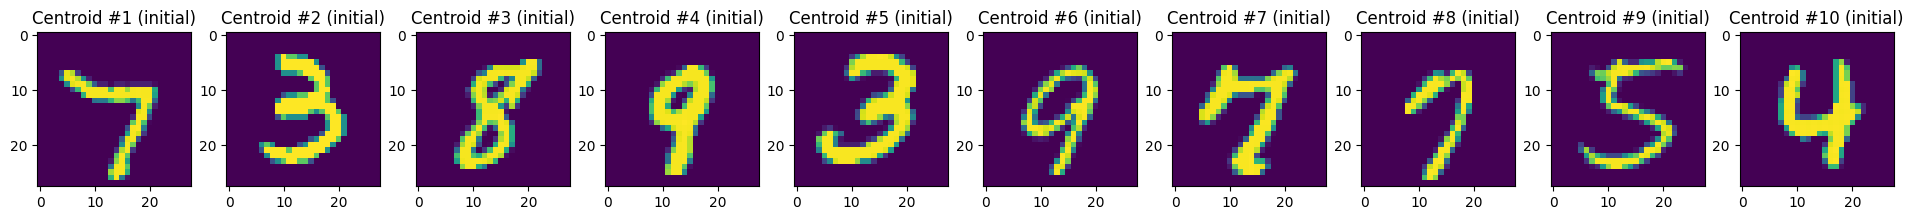

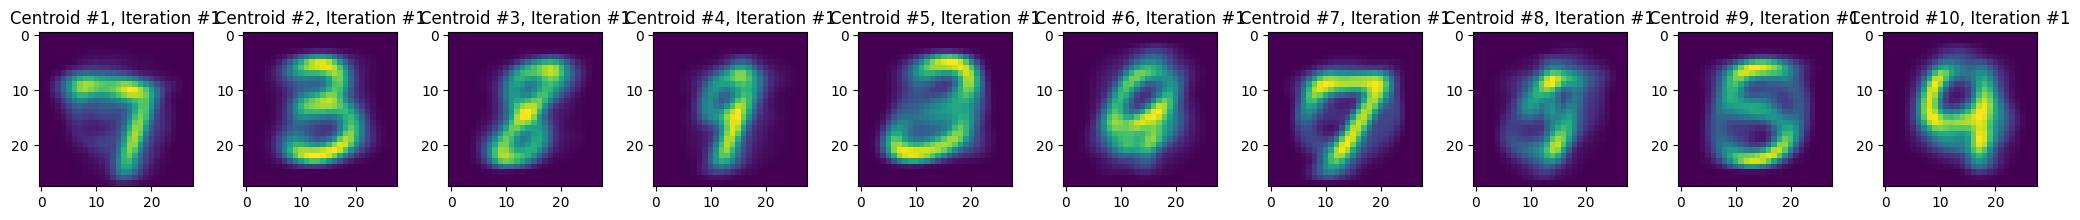

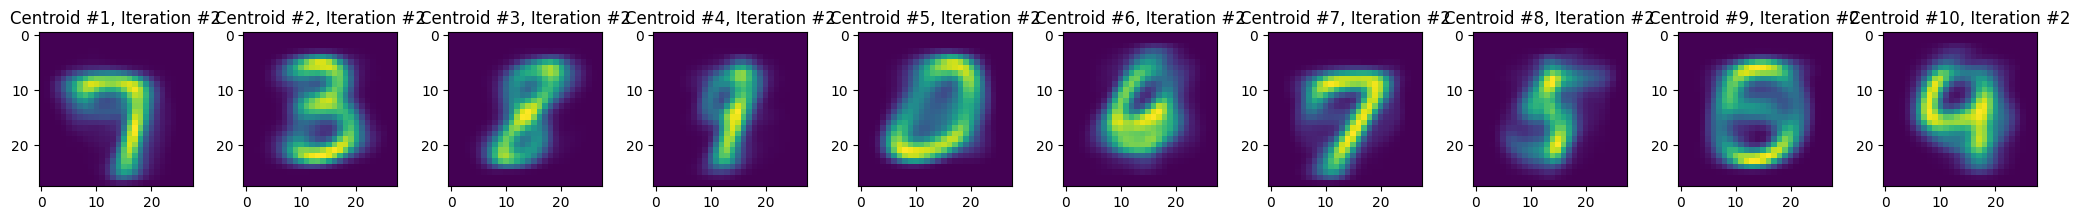

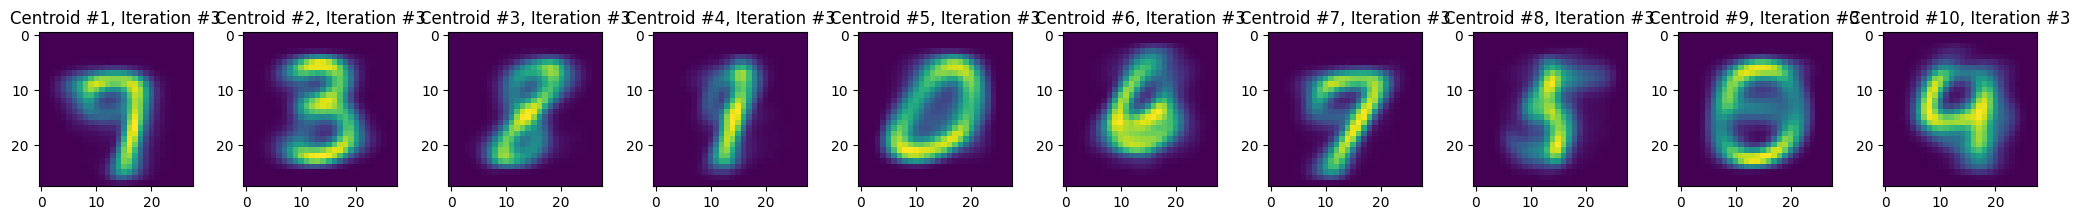

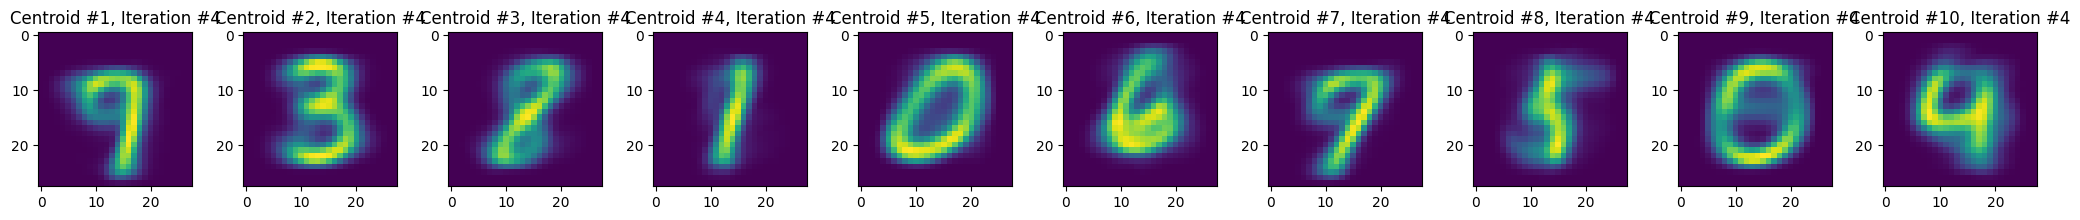

In [12]:
kmean(init_method="random", dist=l2_dist, max_iters=10, tol=0.05)

iter=1 err=7.036384974059402
iter=2 err=6.606923108542027
iter=3 err=6.444503486750168
iter=4 err=6.349427293007117


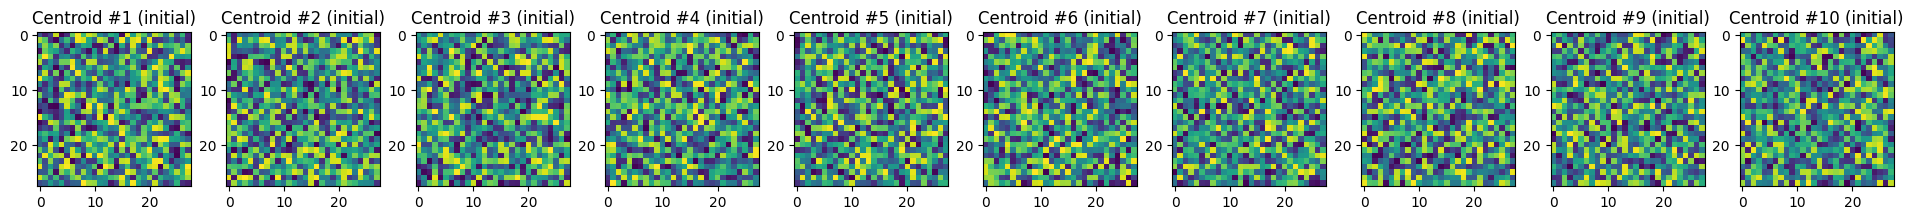

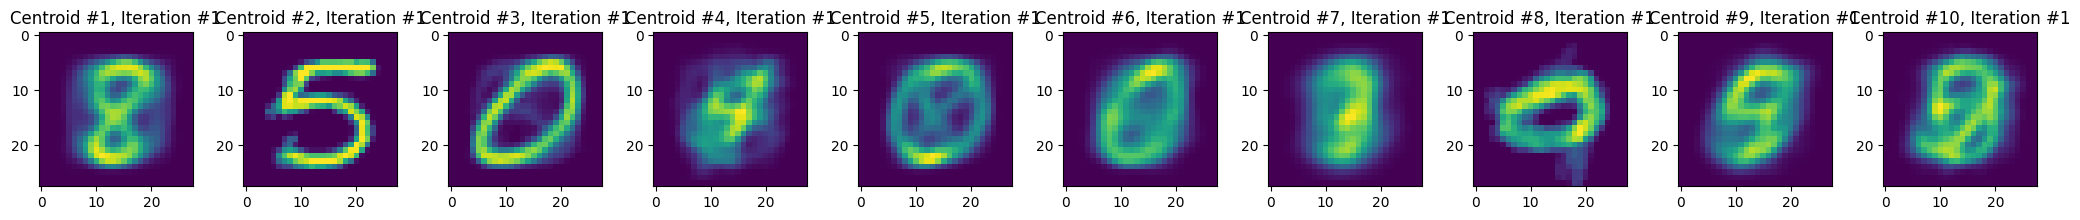

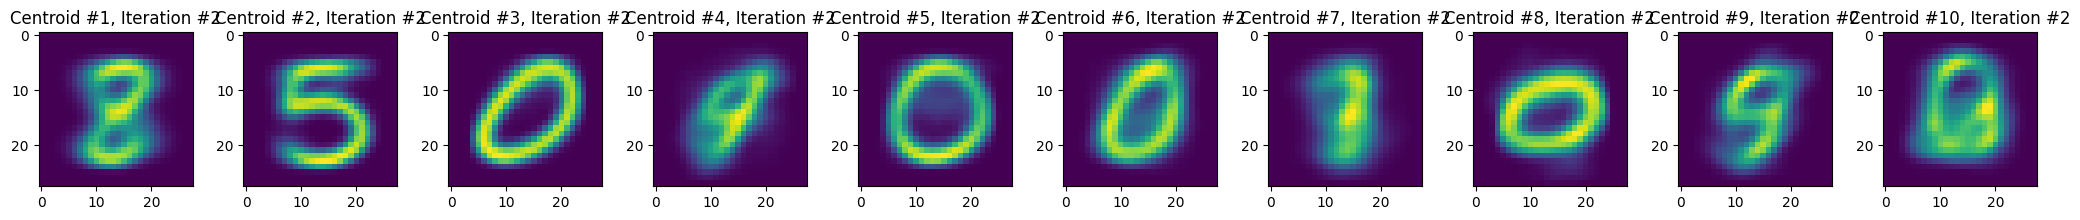

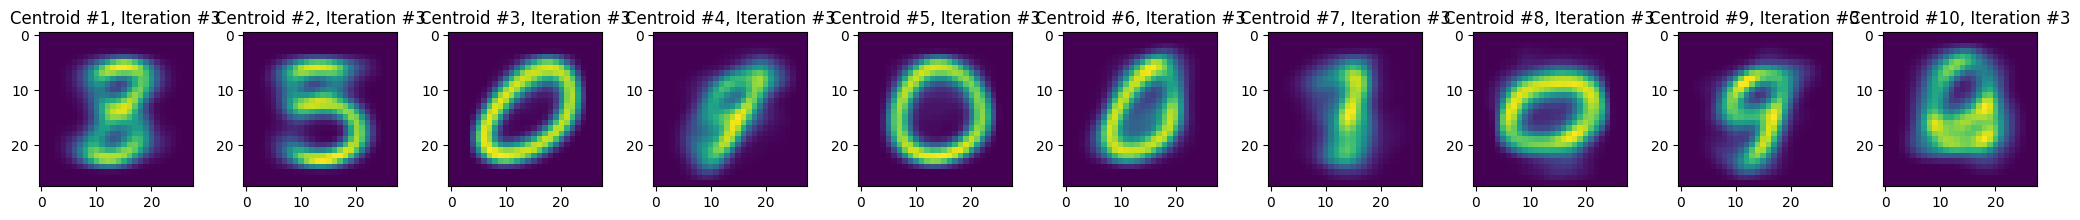

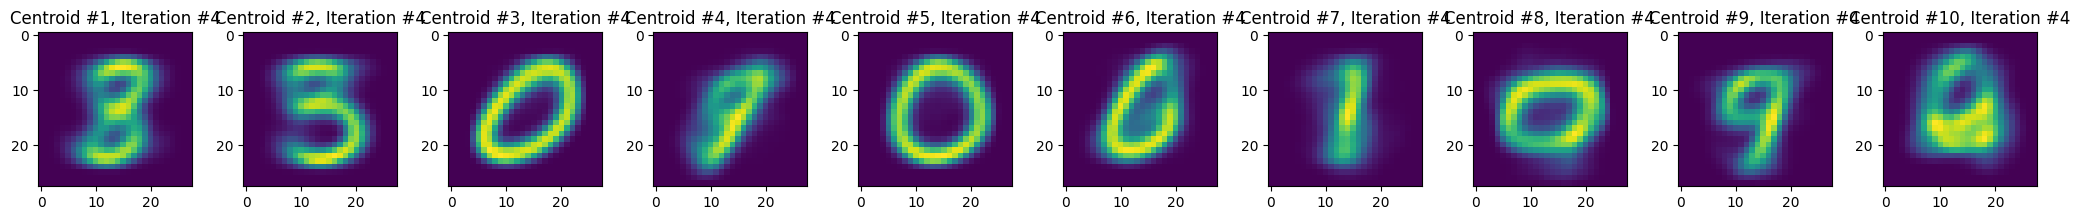

In [13]:
kmean(init_method="noise", dist=l2_dist, max_iters=10, tol=0.05)

iter=1 err=6.354974454144897
iter=2 err=6.22491153687481


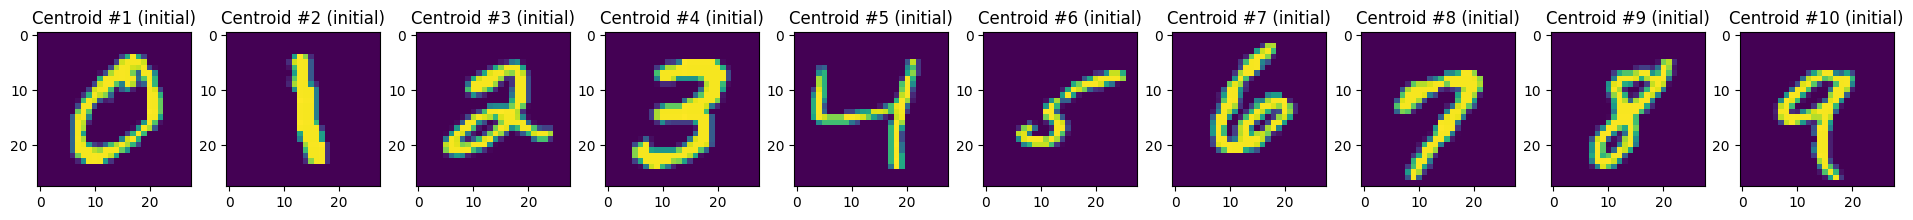

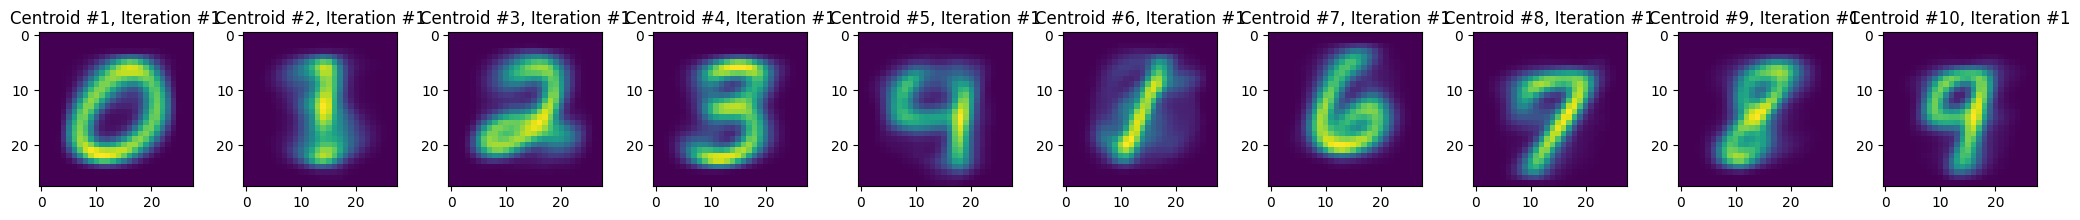

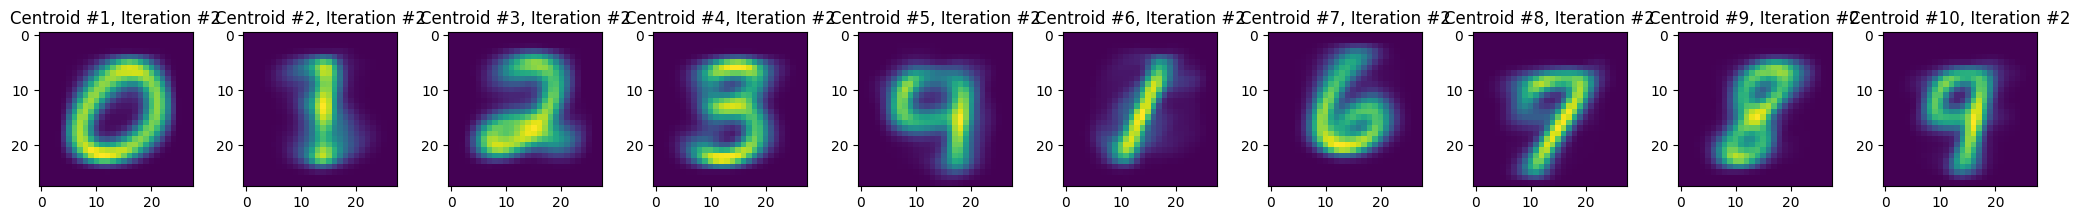

In [14]:
kmean(init_method="1_to_10", dist=l2_dist, max_iters=10, tol=0.05)

# l1_dist experiments

iter=1 err=98.98279400169484
iter=2 err=95.85244314899329
iter=3 err=95.01205878828247
iter=4 err=94.48211014938288
iter=5 err=93.76674834434782
iter=6 err=93.29601212755615
iter=7 err=93.13652208448089
iter=8 err=93.06898210765783


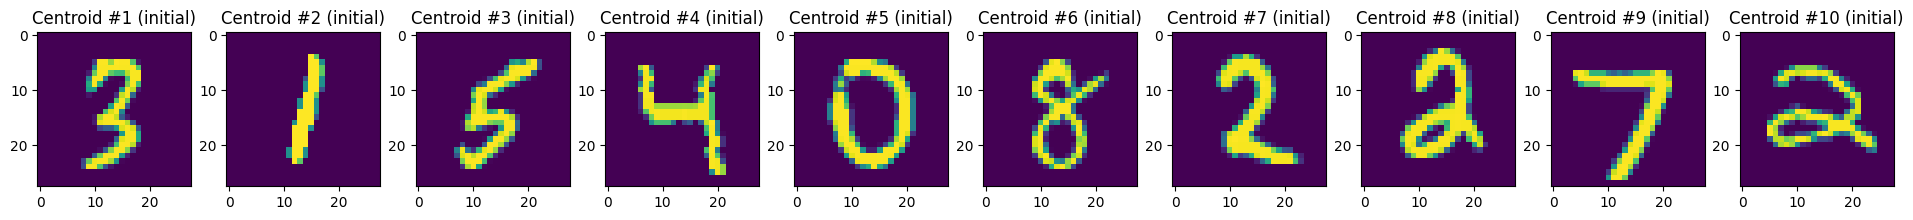

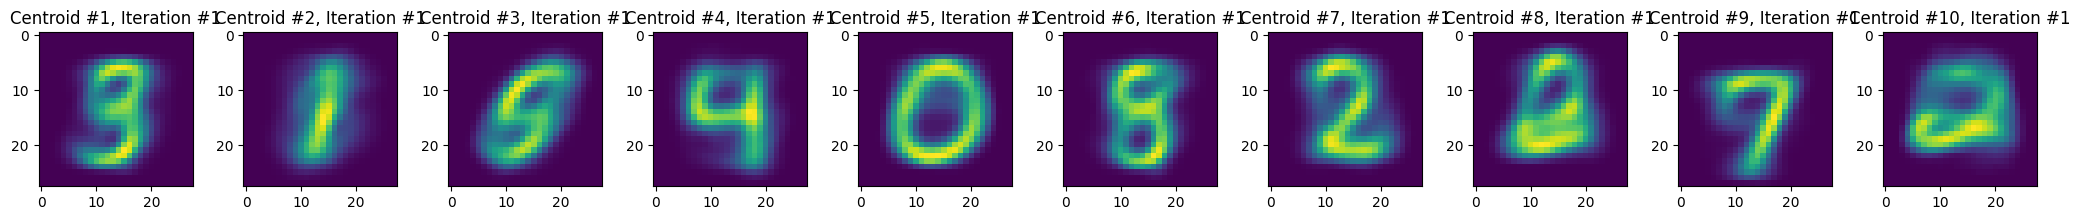

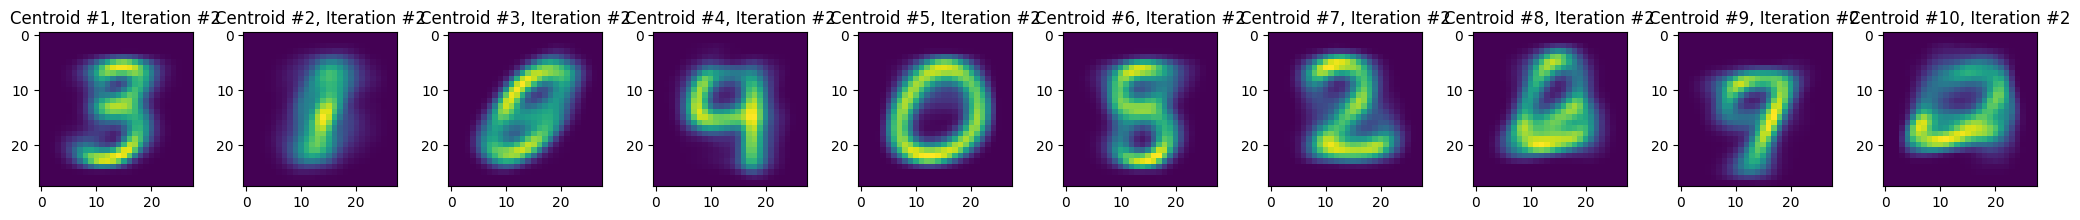

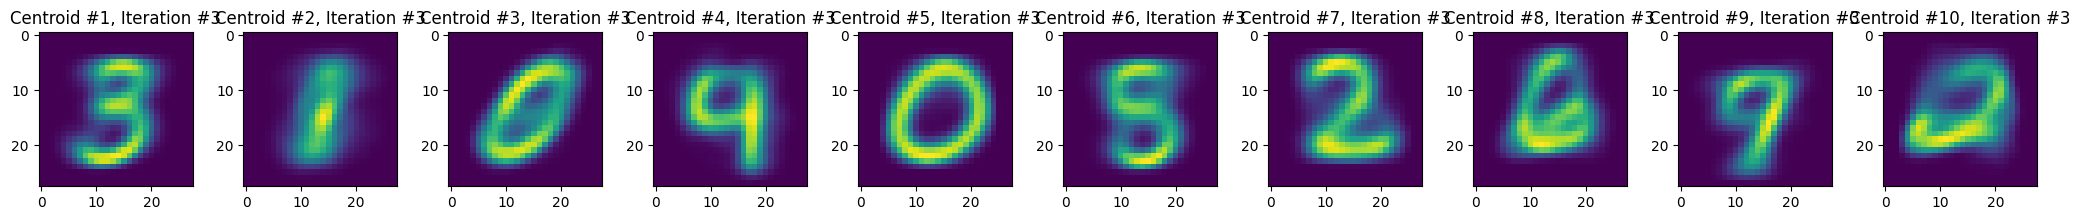

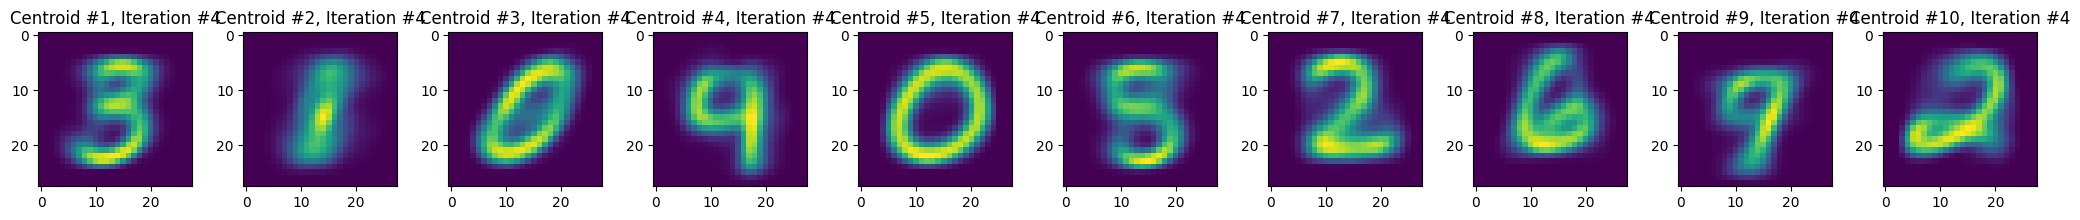

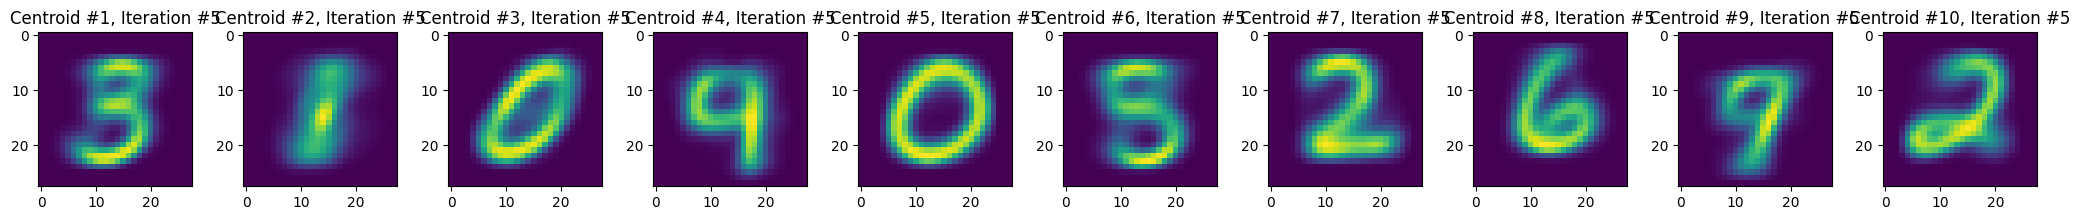

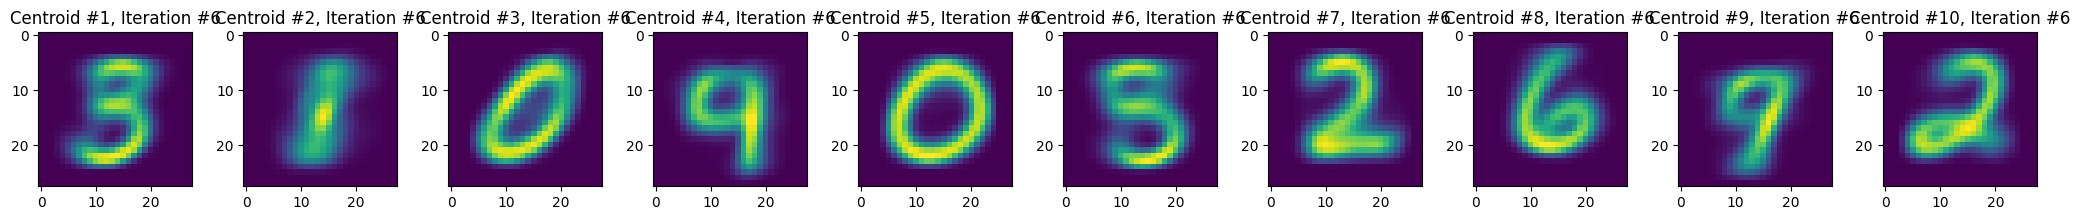

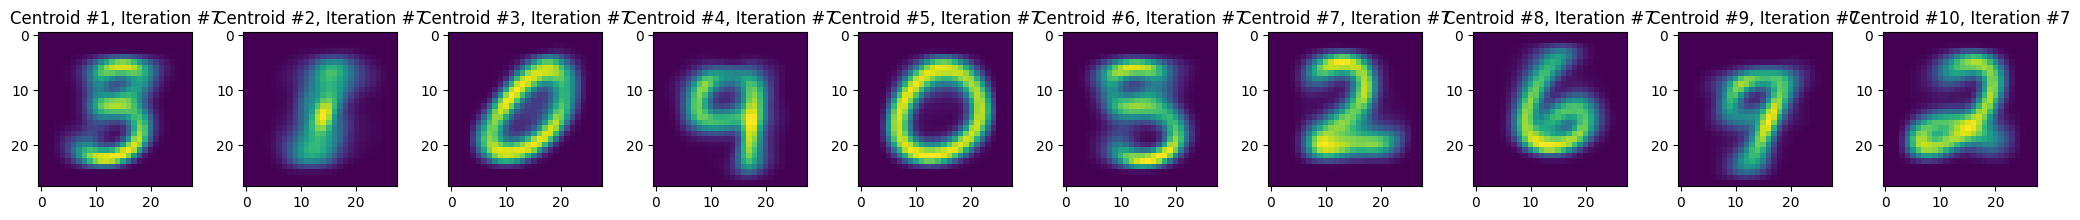

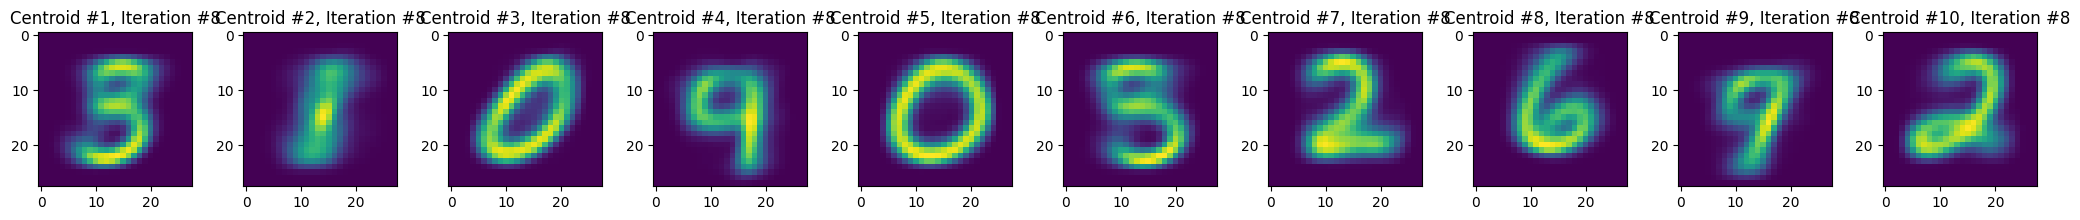

In [17]:
kmean(init_method="random", dist=l1_dist, max_iters=10, tol=0.05)

iter=1 err=111.58975329749256
iter=2 err=100.59317047333042
iter=3 err=97.77781705221281
iter=4 err=96.34668204181311
iter=5 err=95.69432983013357
iter=6 err=95.39905972021805
iter=7 err=95.1955798118328
iter=8 err=94.98384308204896
iter=9 err=94.81770988526311
iter=10 err=94.70423594002253


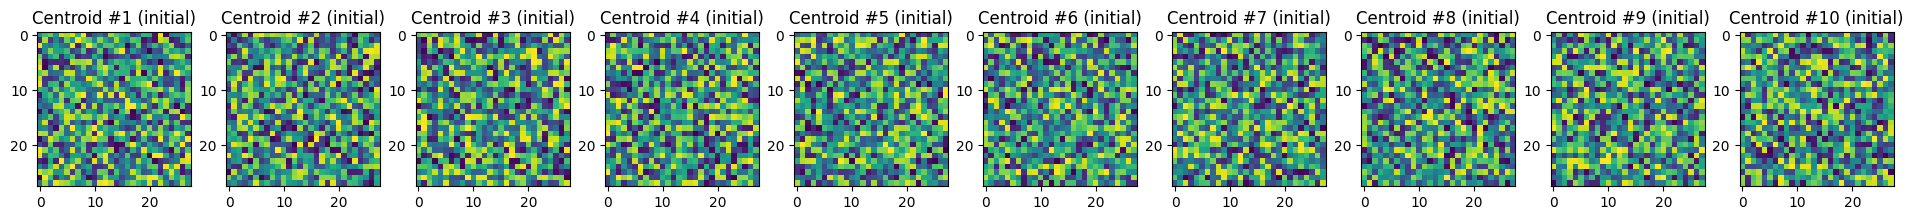

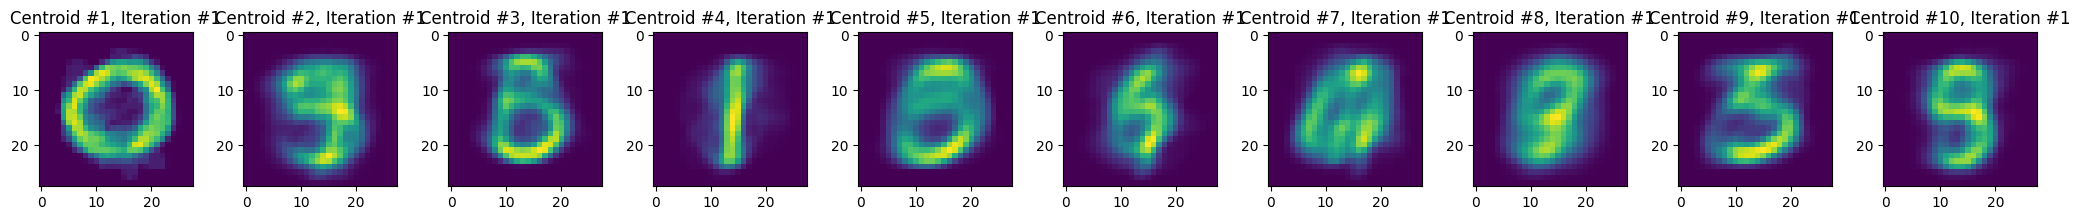

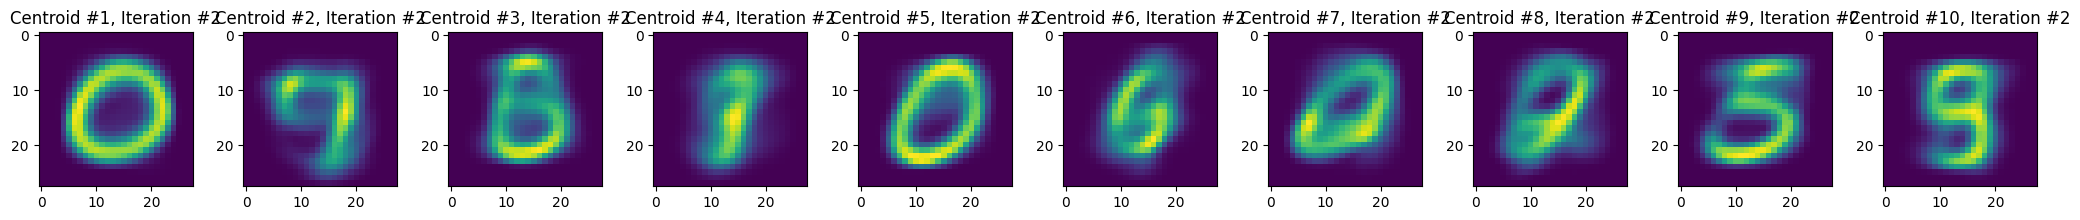

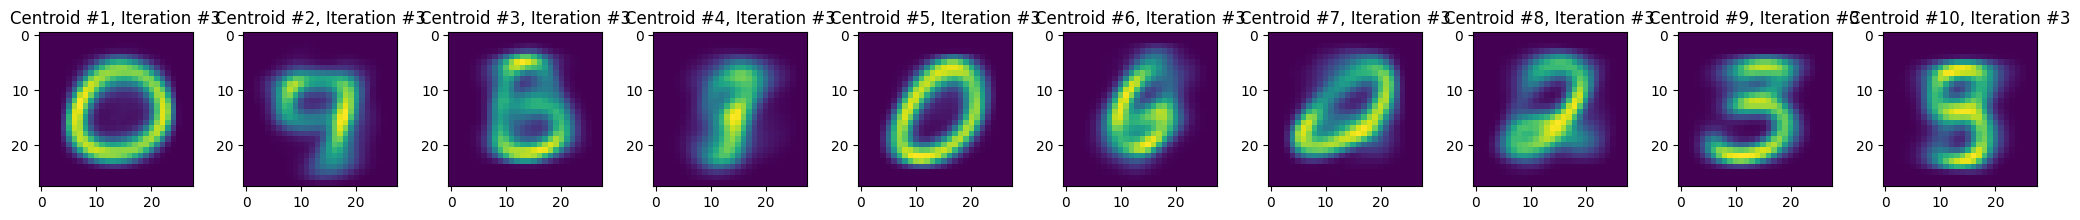

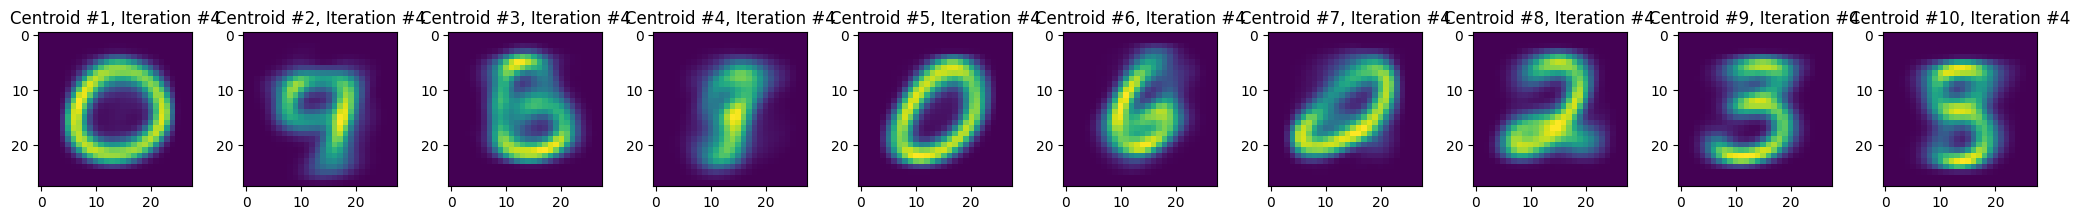

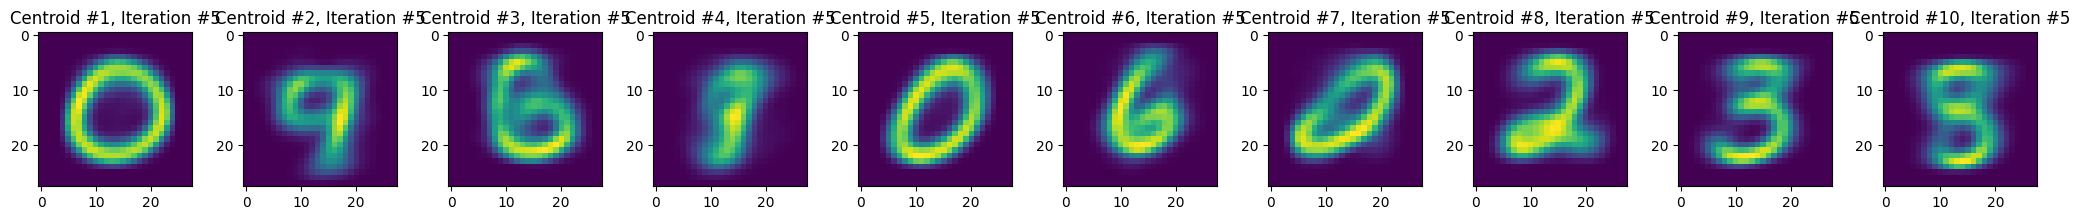

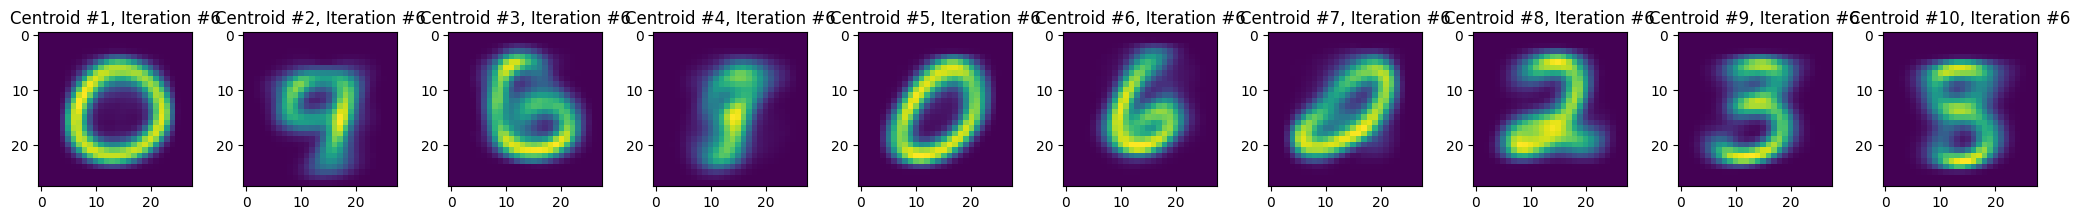

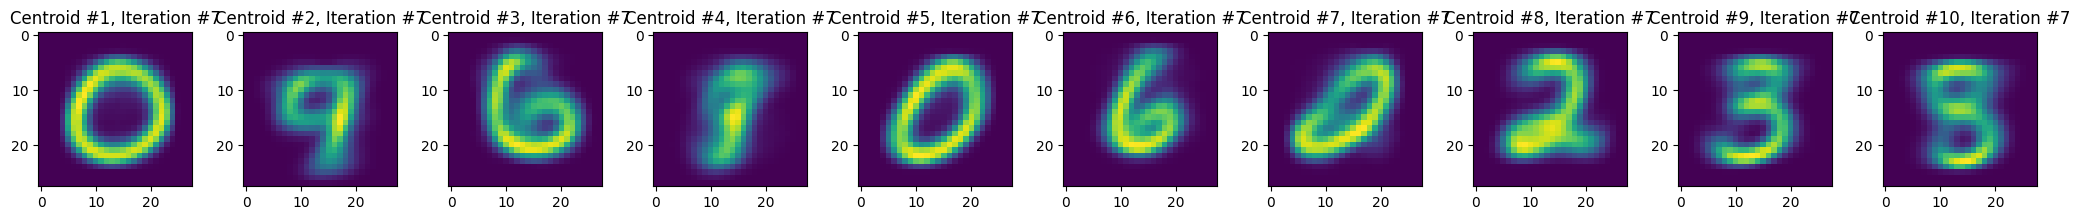

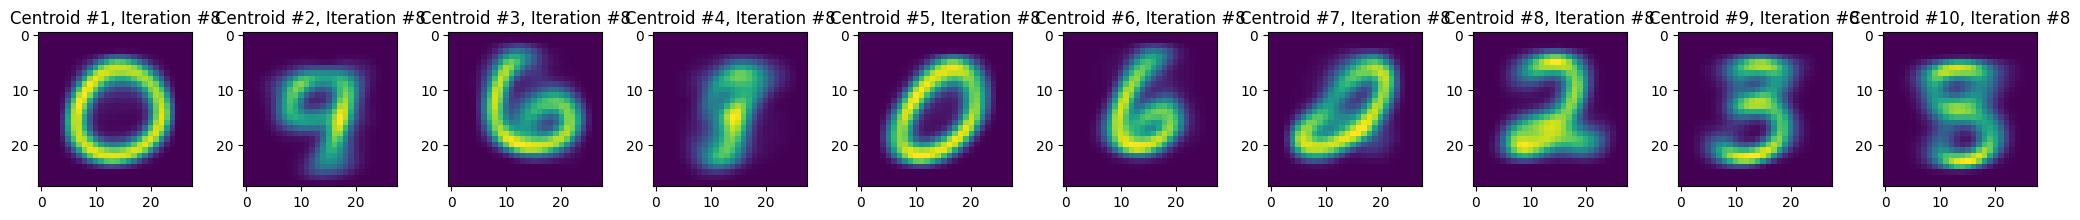

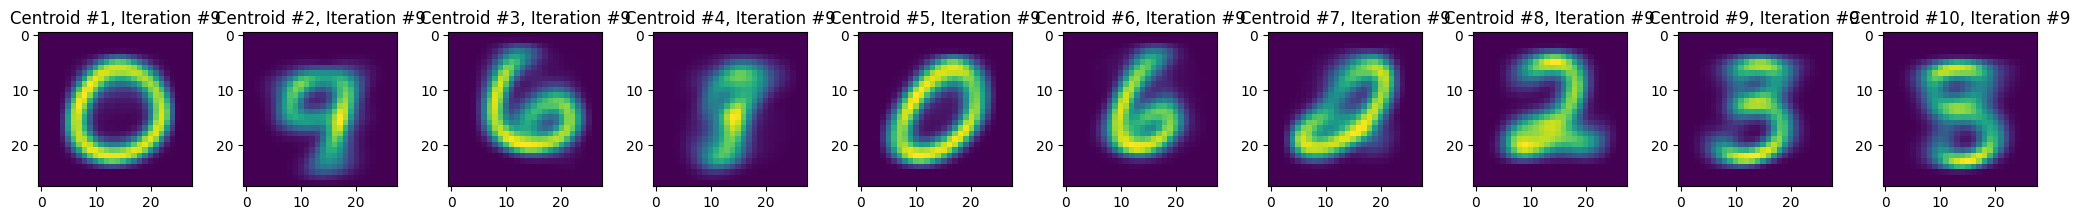

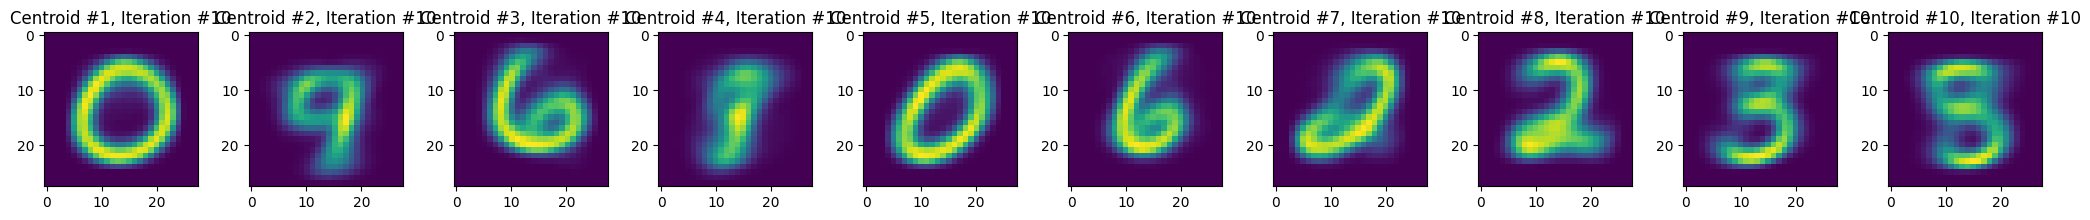

In [20]:
np.random.seed(4022)
kmean(init_method="noise", dist=l1_dist, max_iters=10, tol=0.05)

iter=1 err=95.96288323988956
iter=2 err=93.01033475505628
iter=3 err=92.64774513969253
iter=4 err=92.59156870109112


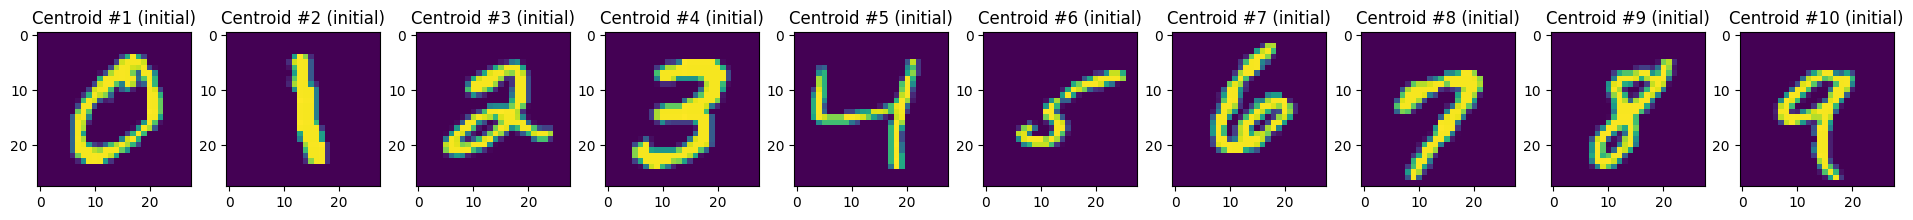

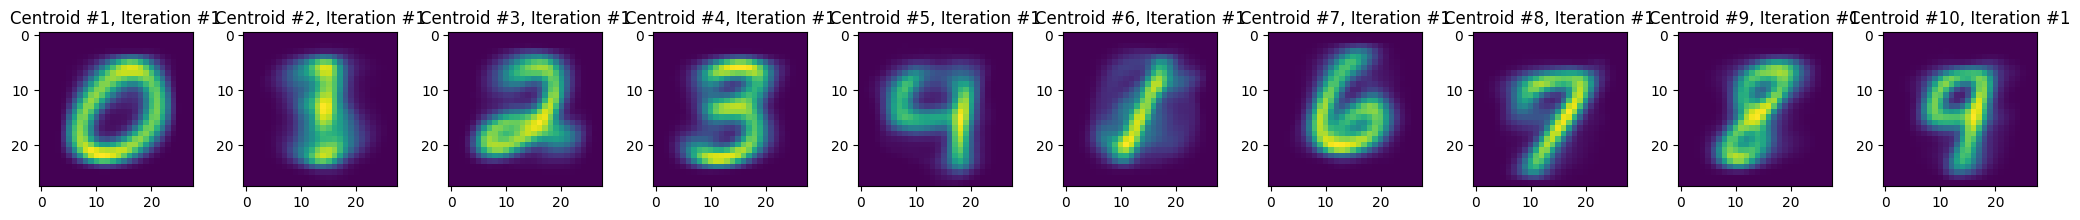

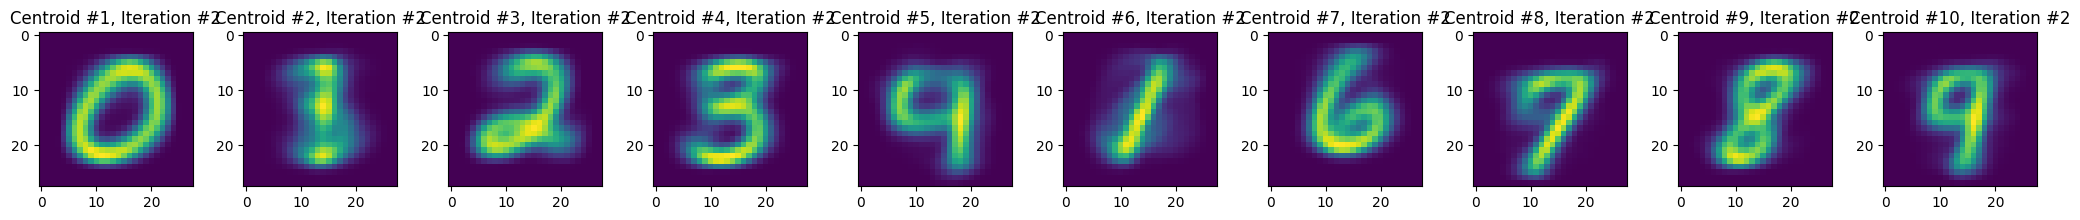

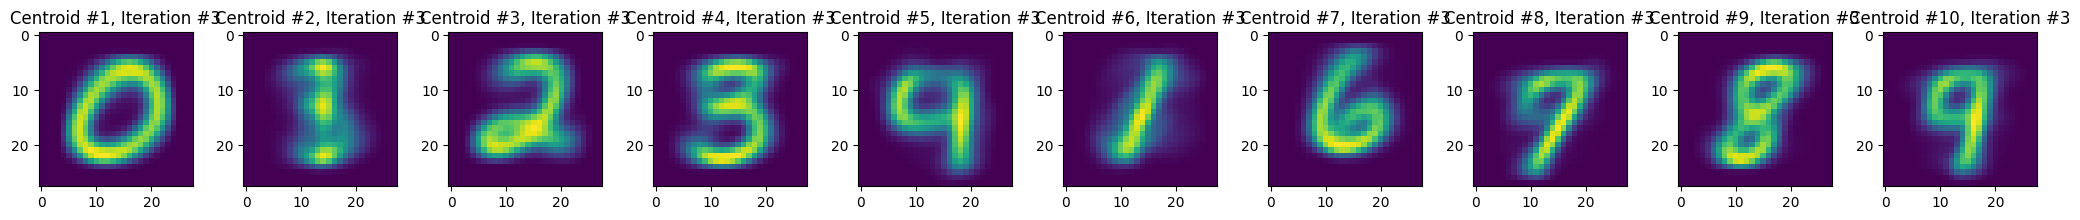

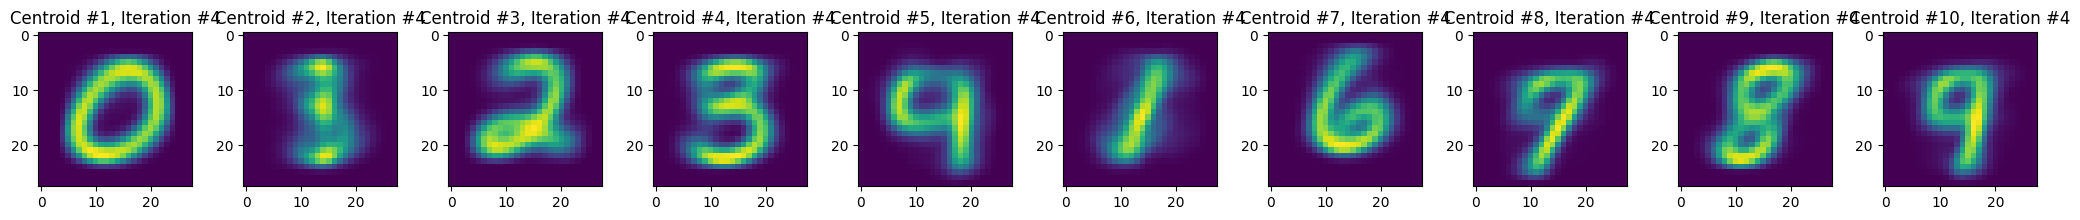

In [19]:
kmean(init_method="1_to_10", dist=l1_dist, max_iters=10, tol=0.05)

# L-infinity experiments

iter=1 err=0.9016962001075187


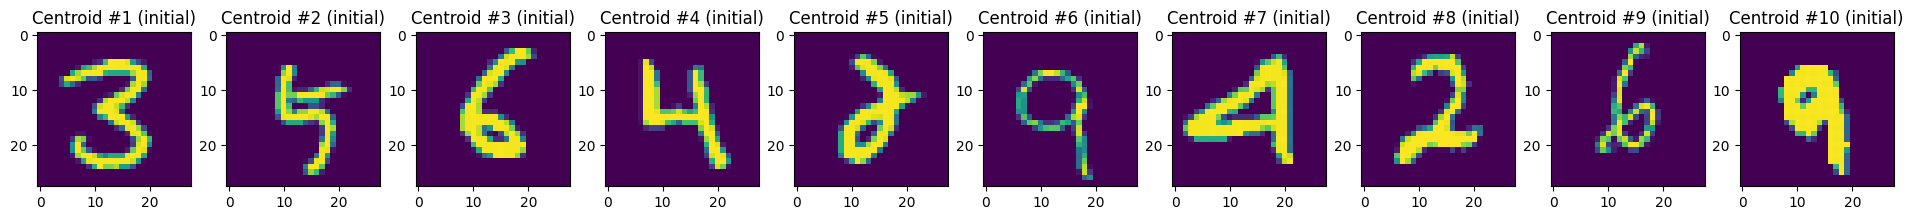

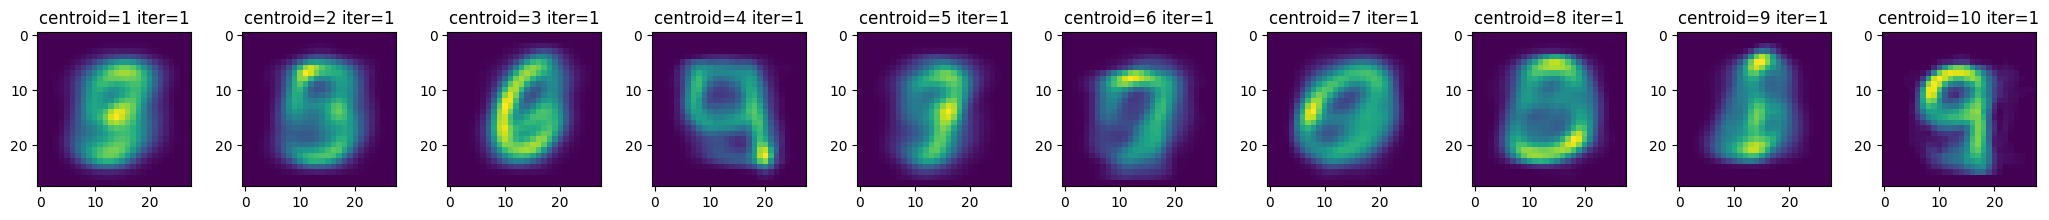

In [23]:
kmean(init_method="random", dist=linf_dist, max_iters=10, tol=0.05)

iter=1 err=0.8966340890205421


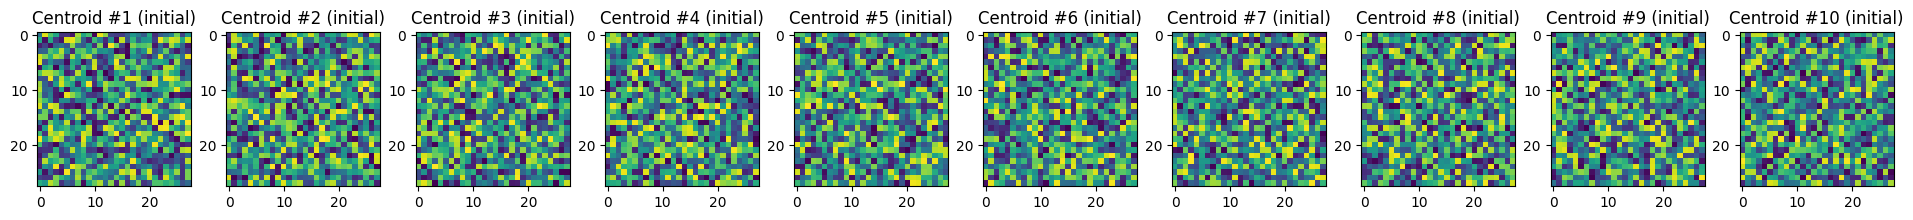

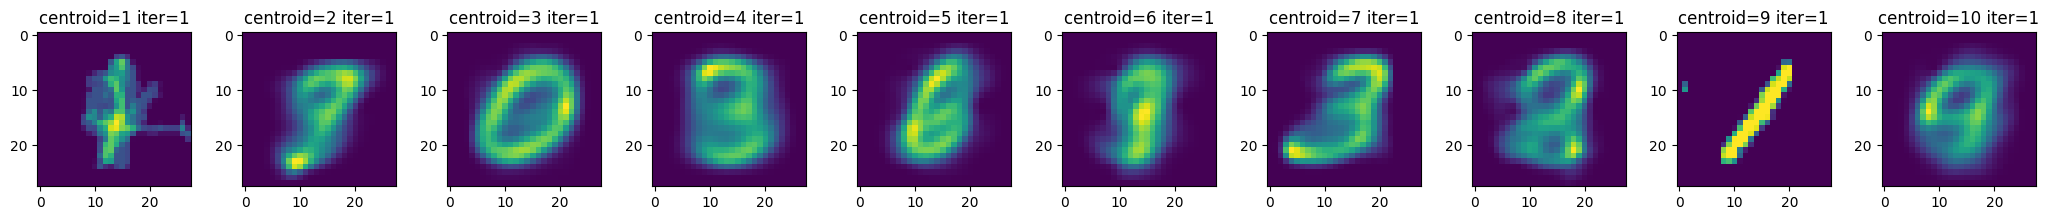

In [25]:
np.random.seed(42)
kmean(init_method="noise", dist=linf_dist, max_iters=10, tol=0.05)

iter=1 err=0.9024297531770076


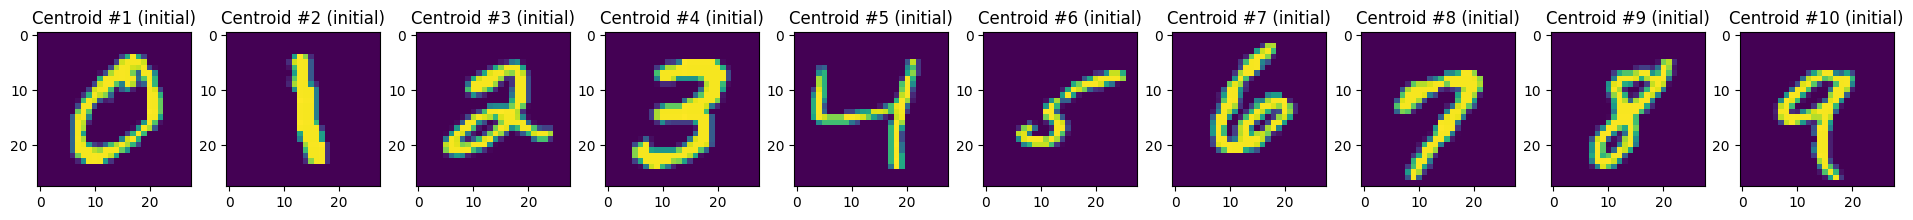

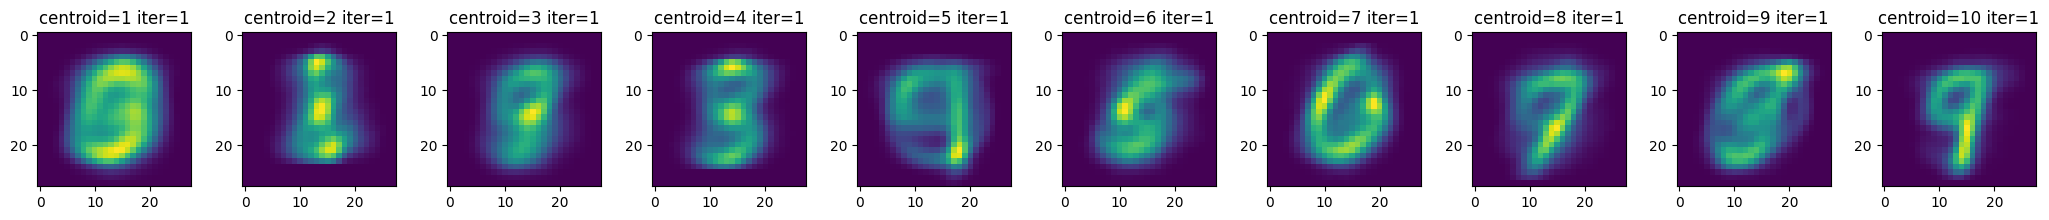

In [26]:
kmean(init_method="1_to_10", dist=linf_dist, max_iters=10, tol=0.05)

# Tolerance experiments

iter=1 err=100.77892227332113
iter=2 err=97.33456523624517
iter=3 err=96.05614577439356
iter=4 err=95.38974689115697
iter=5 err=94.78570100038975
iter=6 err=94.26342552845078
iter=7 err=93.97424961008858
iter=8 err=93.84185323669763
iter=9 err=93.77308777988854


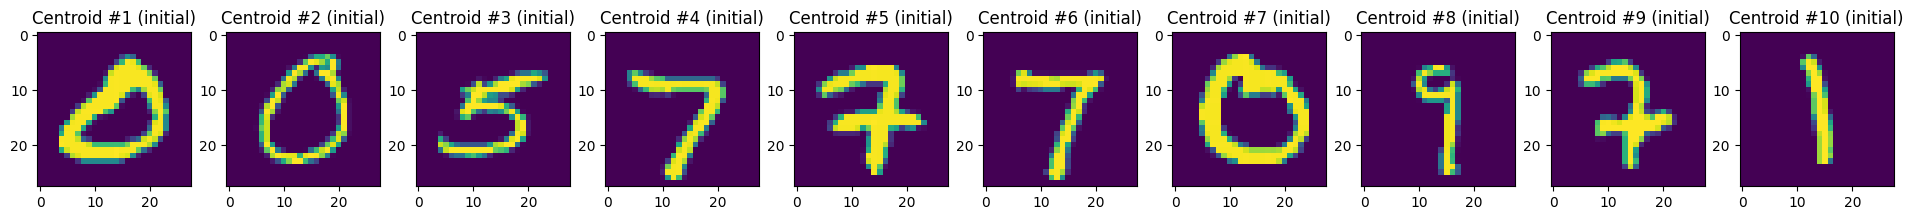

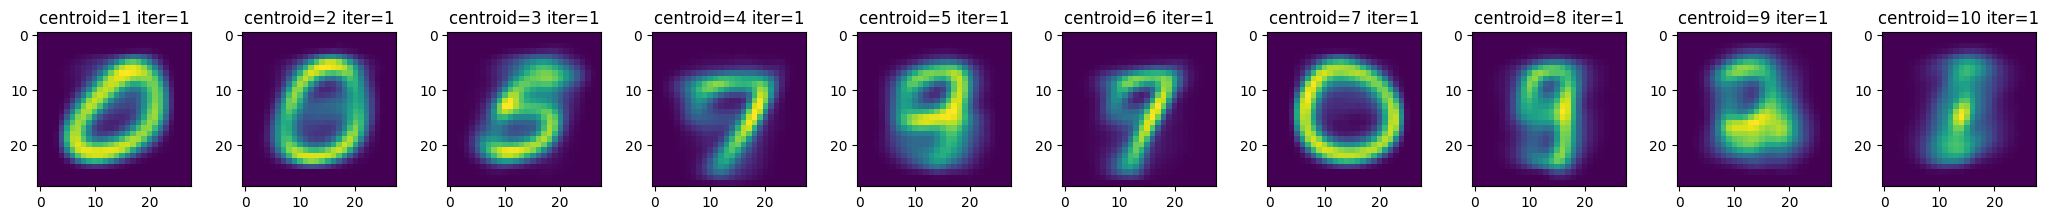

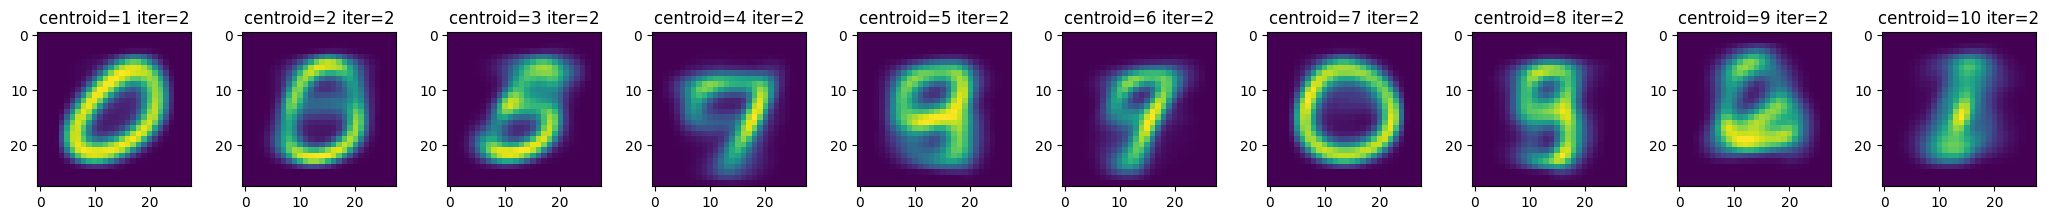

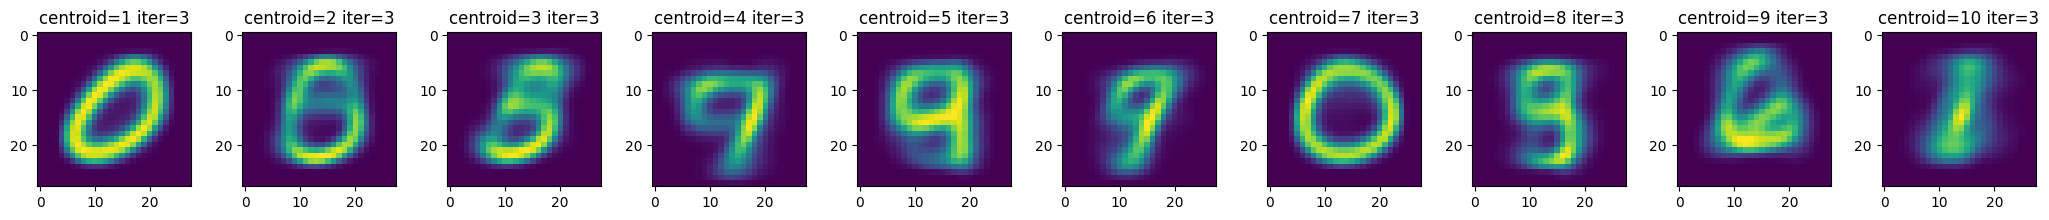

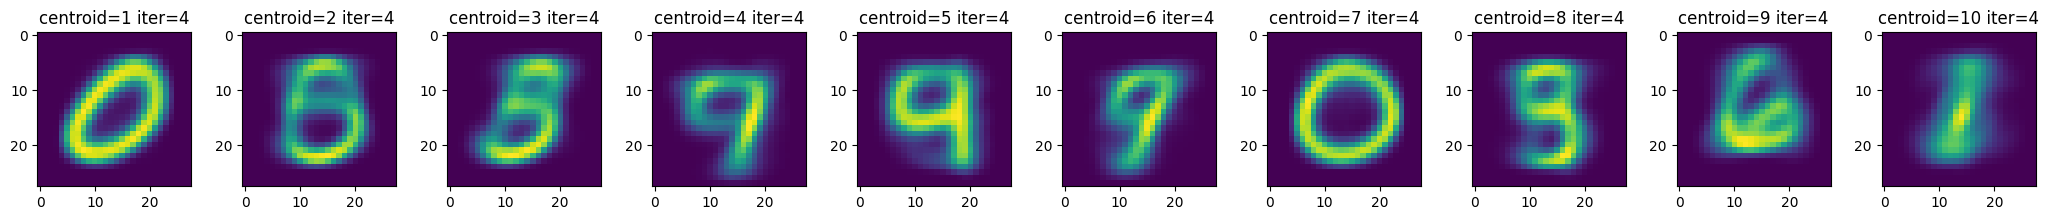

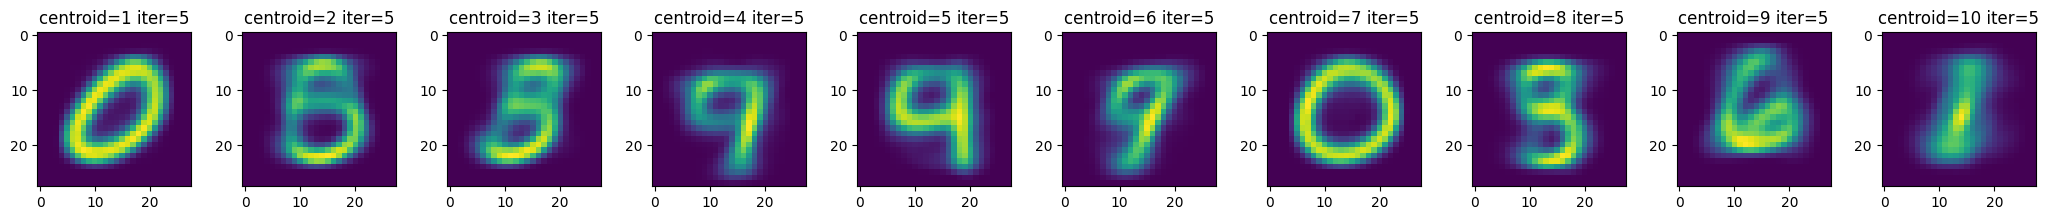

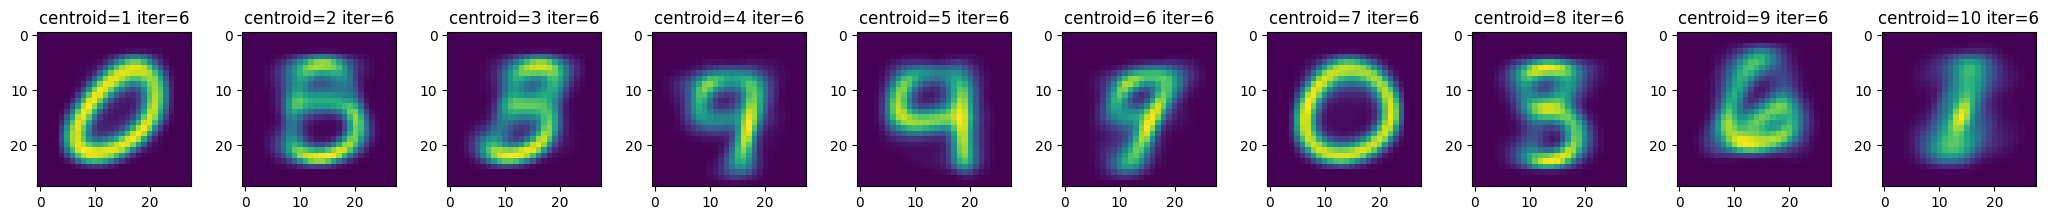

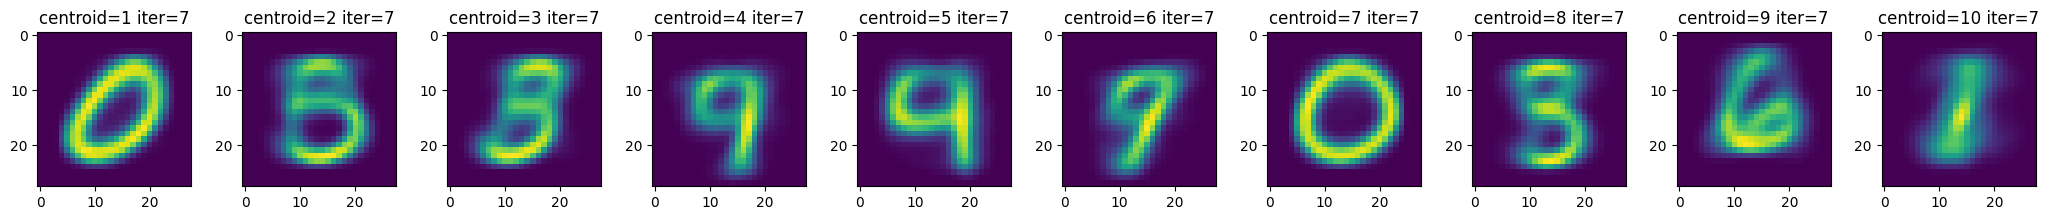

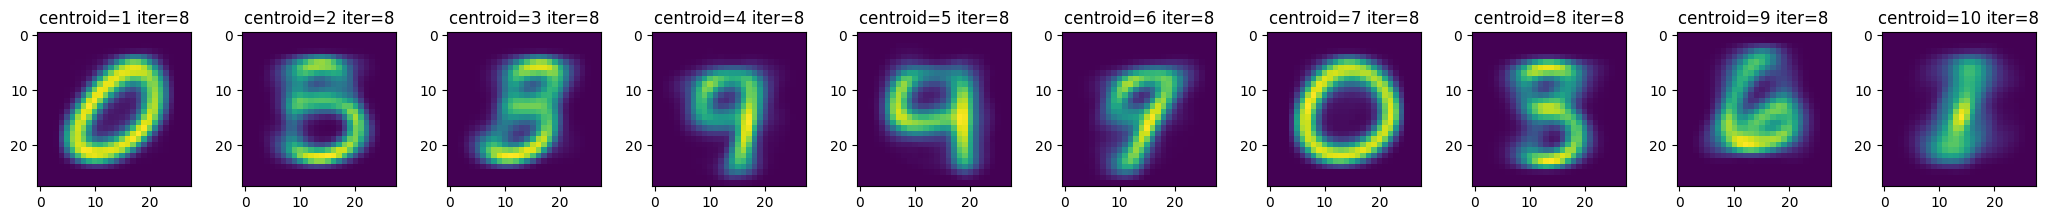

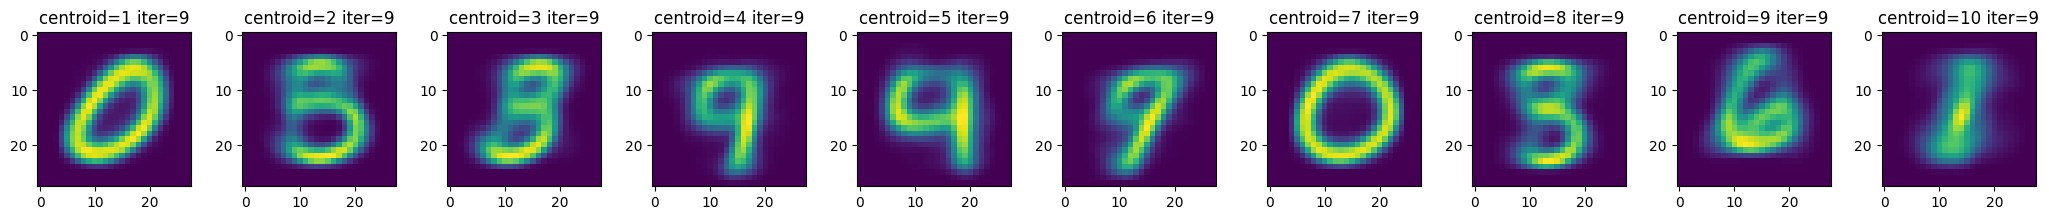

In [27]:
kmean(init_method="random", dist=l2_dist, max_iters=10, tol=0.05)

iter=1 err=6.61857524457176


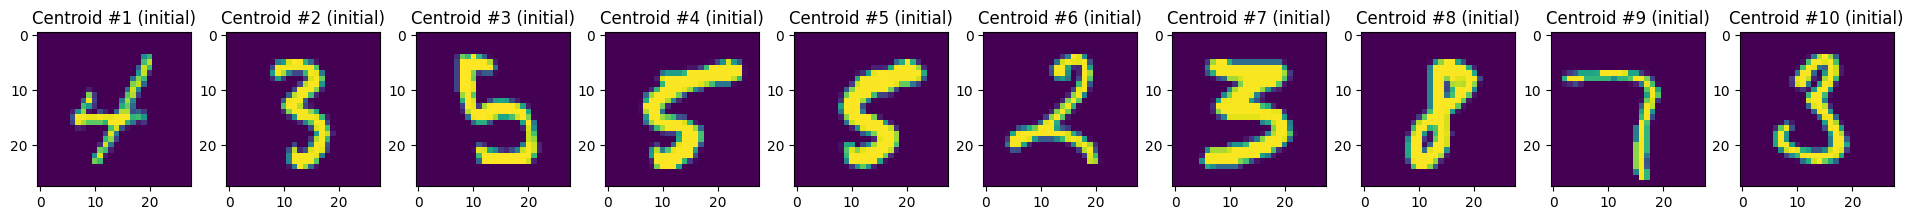

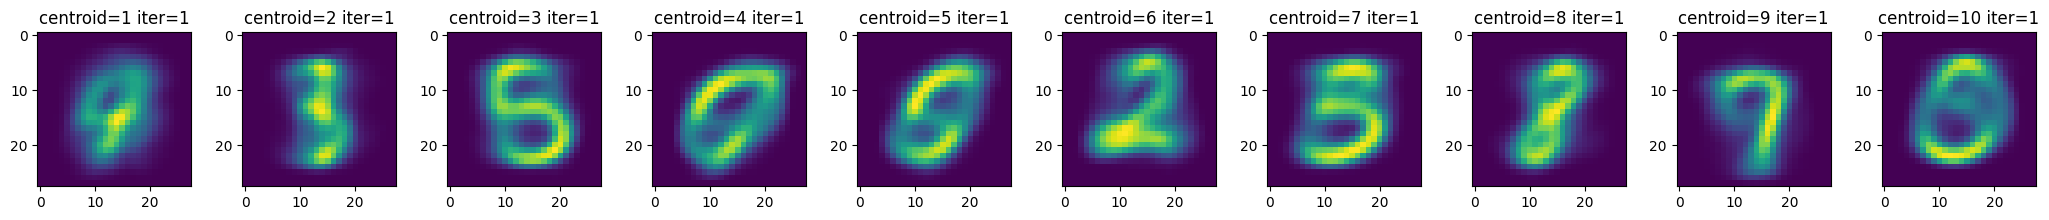

In [28]:
kmean(init_method="random", dist=l2_dist, max_iters=10, tol=0.5)

iter=1 err=6.658764583737739
iter=2 err=6.43749670628992
iter=3 err=6.323582063450581
iter=4 err=6.2682311544683325
iter=5 err=6.243221883307311
iter=6 err=6.229912435693314
iter=7 err=6.220435817720218
iter=8 err=6.213080554794744
iter=9 err=6.20762996267965
iter=10 err=6.203923304295463


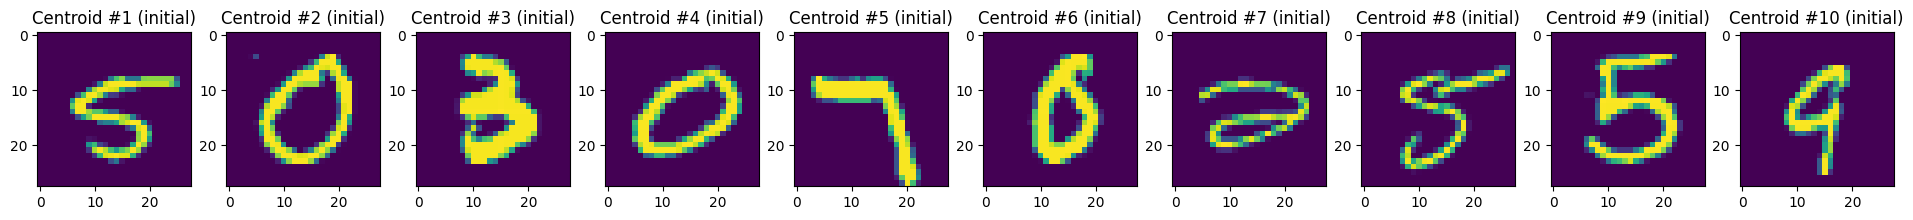

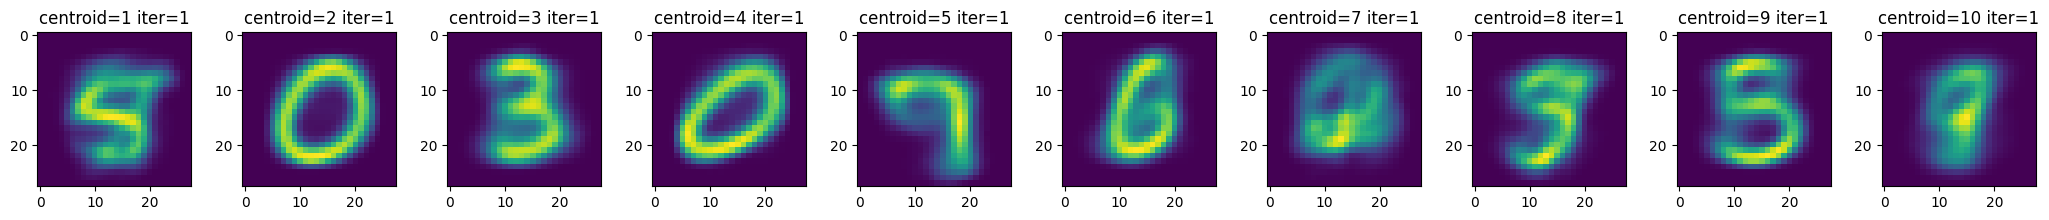

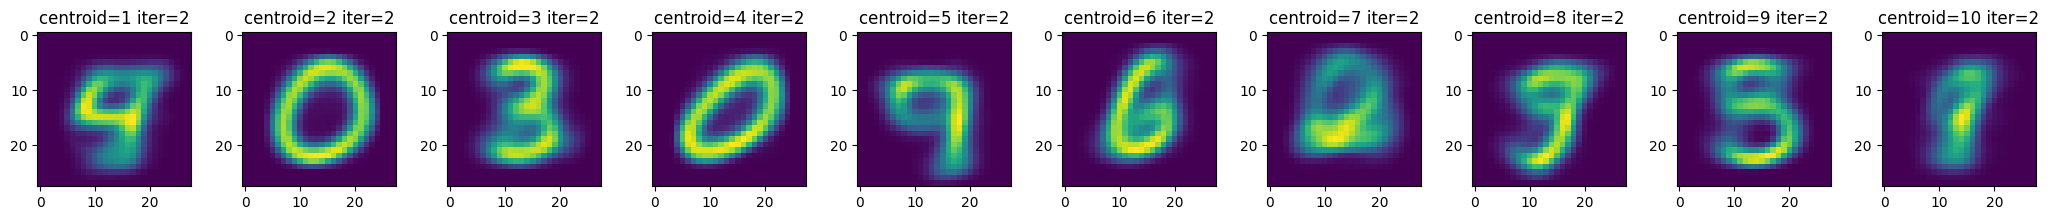

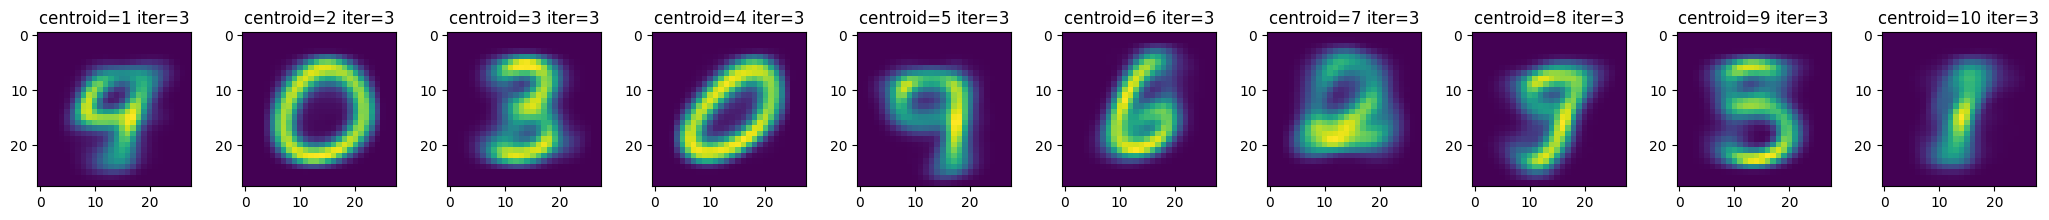

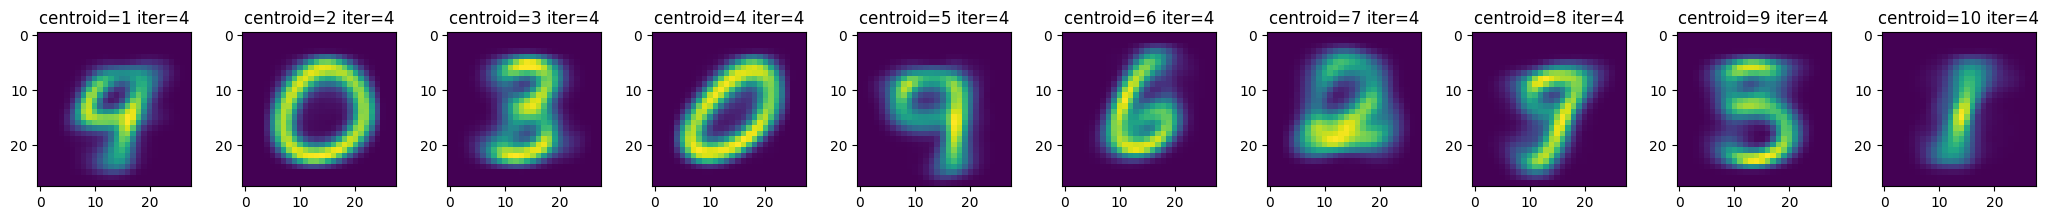

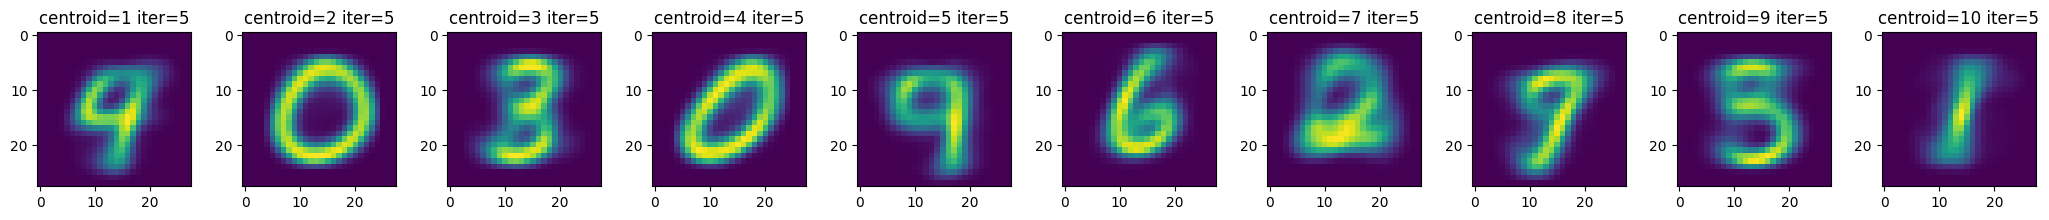

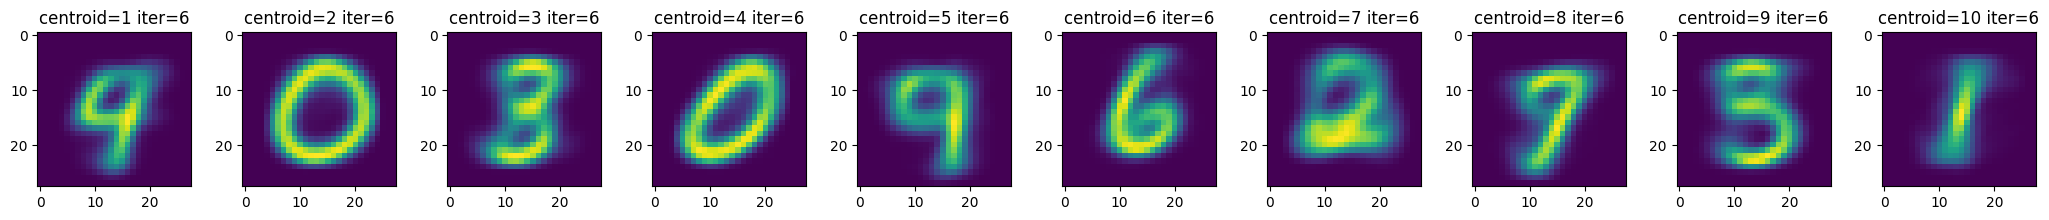

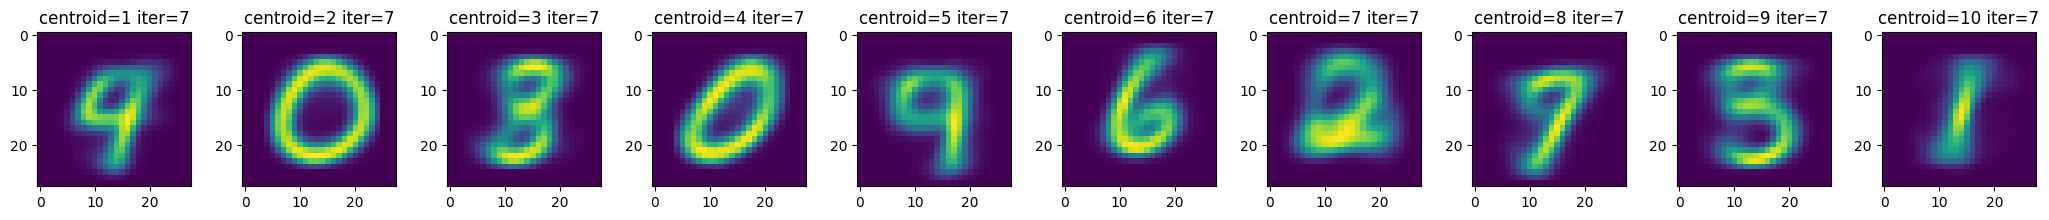

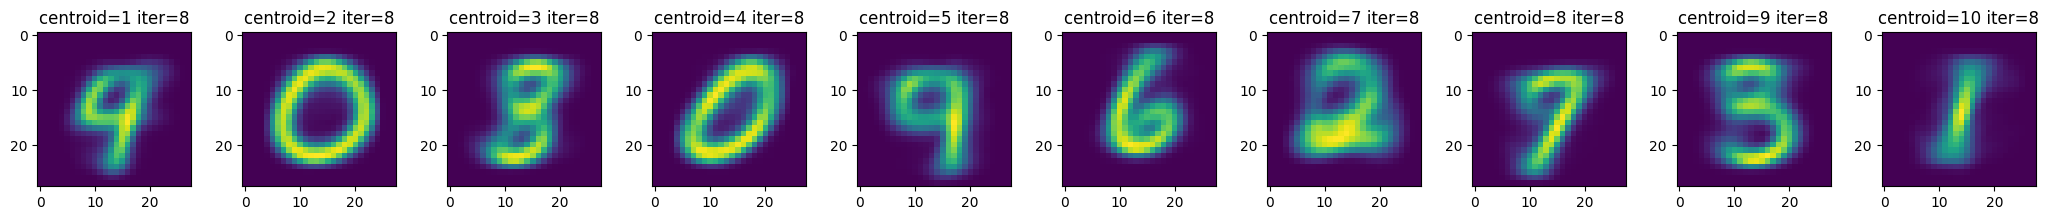

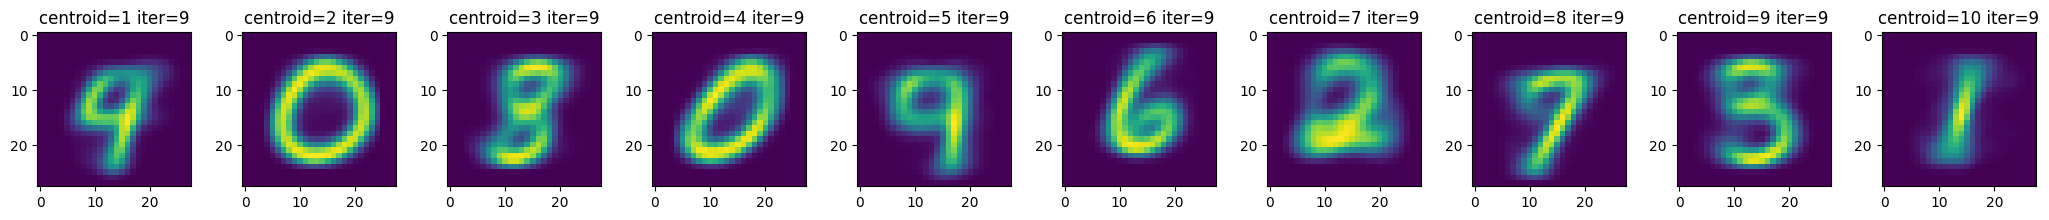

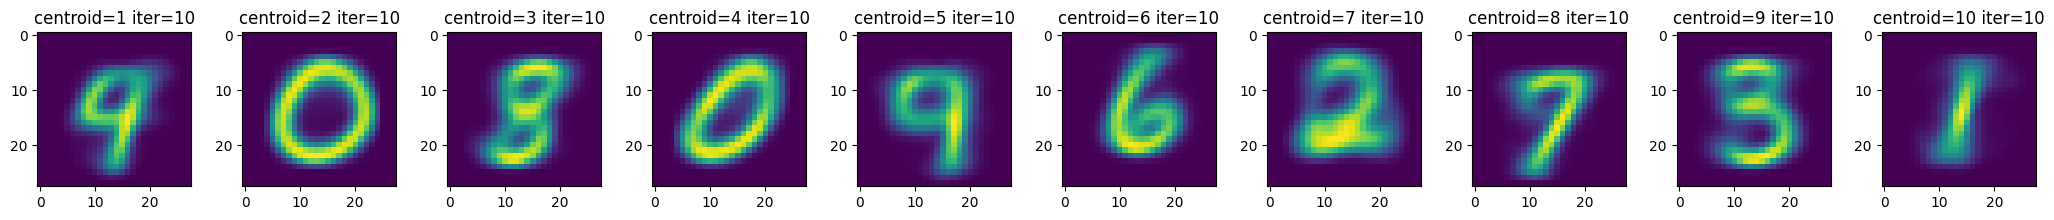

In [29]:
kmean(init_method="random", dist=l2_dist, max_iters=10, tol=0.00001)

## Hierarchical Plan
Do hierarchical clustering to get to k clusters from a (small) subset of the data, then randomly select one point from each cluster


In [15]:
K_2 = 10
cluster_assignments_2 = np.array([-1] * len(x_train))

# find small subset of data to init clusters
indices_2 = np.random.choice(x_train.shape[0], size=2*K_2, replace=False)
subset_2 = x_train[indices_2]

# track indices
original_indices_2 = [[index] for index in indices_2]

# calculate pair distance
distances_2 = np.array([[np.linalg.norm(subset_2[i] - subset_2[j]) for j in range(subset_2.shape[0])] for i in range(subset_2.shape[0])])

while len(subset_2) > K_2:
    min_dist_2 = np.inf
    pair_to_merge_2 = (0, 1)

    # find closest pair
    for i in range(len(subset_2)):
        for j in range(i + 1, len(subset_2)):
            if distances_2[i, j] < min_dist_2:
                min_dist_2 = distances_2[i, j]
                pair_to_merge_2 = (i, j)

    # merge closest pair
    new_point_2 = (subset_2[pair_to_merge_2[0]] + subset_2[pair_to_merge_2[1]]) / 2

    # update subset
    new_indices_2 = list(set(range(len(subset_2))) - set(pair_to_merge_2))
    subset_2 = np.vstack([subset_2[new_indices_2], new_point_2])

    # update original indices tracking
    merged_indices = original_indices_2[pair_to_merge_2[0]] + original_indices_2[pair_to_merge_2[1]]
    original_indices_2 = [original_indices_2[idx] for idx in new_indices_2] + [merged_indices]

    # recalculate distance matrix
    new_distances_2 = np.zeros((len(subset_2), len(subset_2)))
    for i in range(len(subset_2)):
        for j in range(i + 1, len(subset_2)):
            new_distances_2[i, j] = new_distances_2[j, i] = np.linalg.norm(subset_2[i] - subset_2[j])
        new_distances_2[i, i] = np.inf # makes sure not the same point
    distances_2 = new_distances_2

# calculate centroids
centroids_2 = np.zeros((K_2, x_train.shape[1]))
for i in range(K_2):
    points_indices = np.hstack(original_indices_2[i])
    centroids_2[i] = np.mean(x_train[points_indices], axis=0)

centroids_2.shape


(10, 784)

NameError: name 'K' is not defined

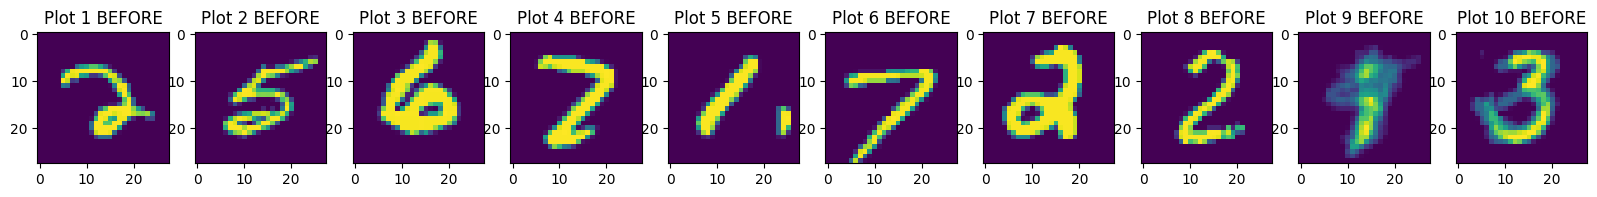

In [16]:
tol=0.05 # experiment with this

prev_error = float("inf")
curr_error = float("inf")

N = len(x_train)
counter = 0

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
  axs[i].imshow(centroids_2[i].reshape((28,28)))  # Replace with your data
  axs[i].set_title(f'Plot {i+1} BEFORE')  # Set a title for each plot

for i in range(10):
  counter +=1
  # print("COUNTER:", counter)
  for i in range(N):
    # Calculate the distance from the data point to each centroid
    dists = [l2_dist(x_train[i], centroid) for centroid in centroids_2]
    # Assign the data point to the cluster with the nearest centroid
    assignment = dists.index(min(dists))
    cluster_assignments_2[i] = assignment

  # update centroids
  for centroid_num in range(K):
    new_centroids = np.array([x_train[cluster_assignments_2 == i].mean(axis=0) for i in range(K)])

    # Check for convergence
    # if np.all(centroids == new_centroids): break
    centroids_2 = new_centroids

  # meanerror
  meanerror = 0
  for i in range(N):
    meanerror += l2_dist(x_train[i], centroids_2[cluster_assignments_2[i]])**2
  meanerror = meanerror / len(x_train)
  curr_error = meanerror

  if abs(curr_error - prev_error) <= tol: break
  print(counter, abs(curr_error - prev_error))
  prev_error = curr_error

  # print("PLOT", centroids[0])
  # plt.imshow(centroids[0].reshape((28,28)))

  fig, axs = plt.subplots(1, 10, figsize=(20, 2))
  for i in range(10):
    axs[i].imshow(centroids_2[i].reshape((28,28)))  # Replace with your data
    axs[i].set_title(f'Plot {counter} {i+1} AFTER')  # Set a title for each plot

# Show the plot
plt.show()

## MinMax Initialization
Pick a first point randomly, then subsequently pick subsequent points to be as far as possible from each of the previous points. (i.e. append point with maximal minimum distance to the set of chosen points)

In [ ]:
K_3 = 10

cluster_assignments_3 = np.array([-1] * len(x_train))

indices_3 = [np.random.choice(x_train.shape[0])]
centroids_3 = [x_train[indices_3[-1]]]

while len(centroids_3) < K_3:
    # find dists for all points
    distances = np.array([min([l2_dist(x, centroid) for centroid in centroids_3]) for x in x_train])
    # pick max dist
    next_index = np.argmax(distances)
    centroids_3.append(x_train[next_index])
    indices_3.append(next_index)

centroids_3 = np.array(centroids_3)

centroids_3.shape

(10, 784)

1 inf
2 419372.0720369164
3 89643.72493412392
4 62048.45758125745
5 62976.60593204666
6 60036.56109492201
7 37537.93536824174
8 16607.464760775212
9 8975.556178018916
10 5520.640098469332


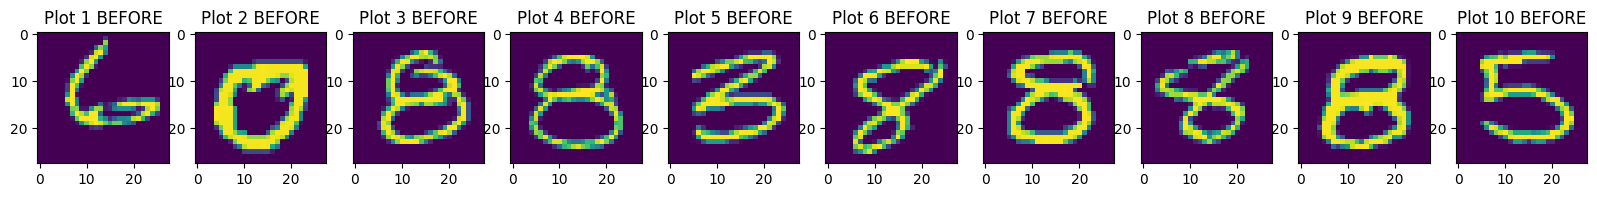

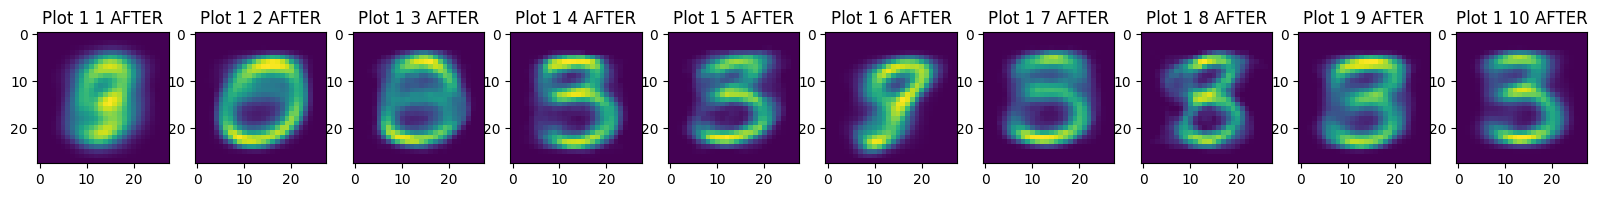

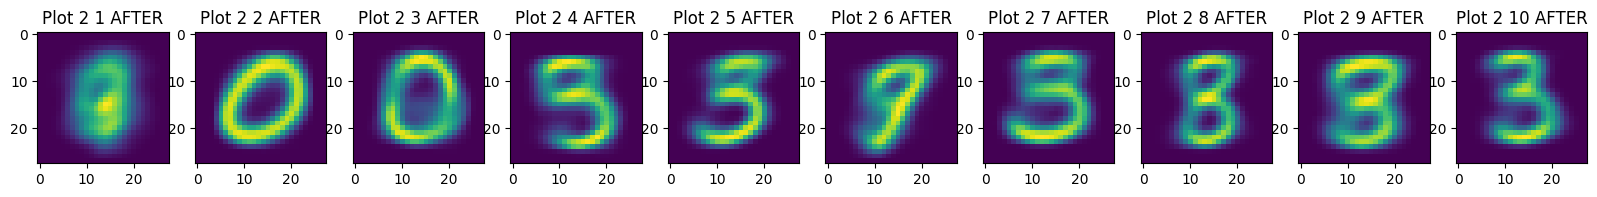

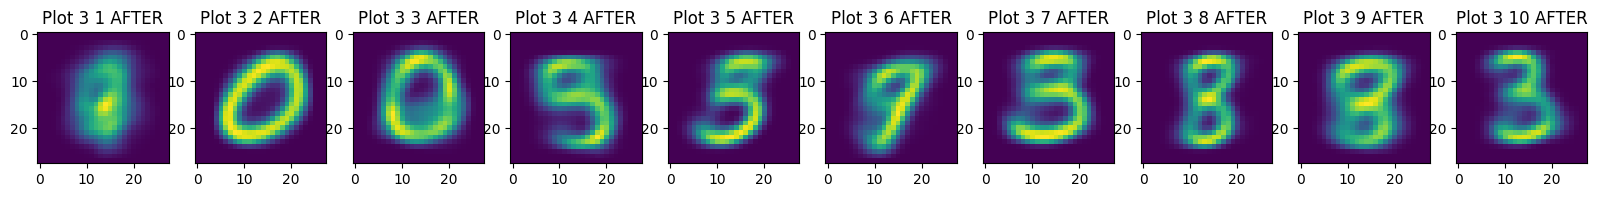

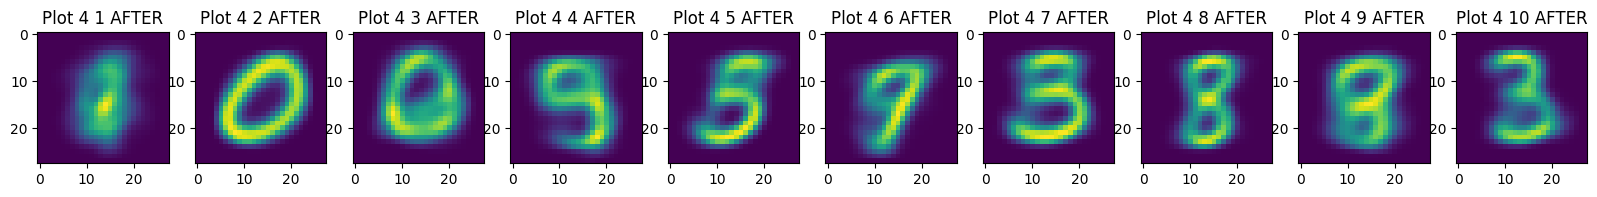

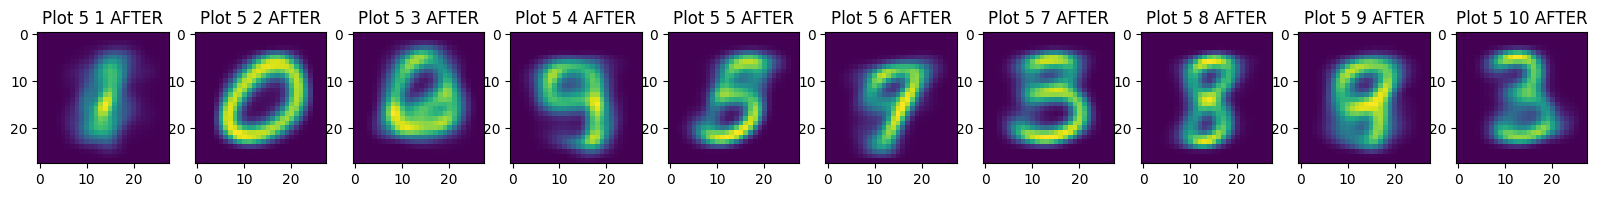

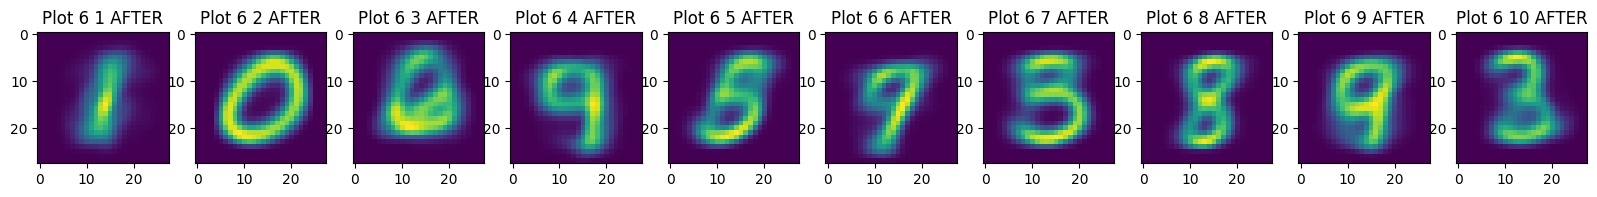

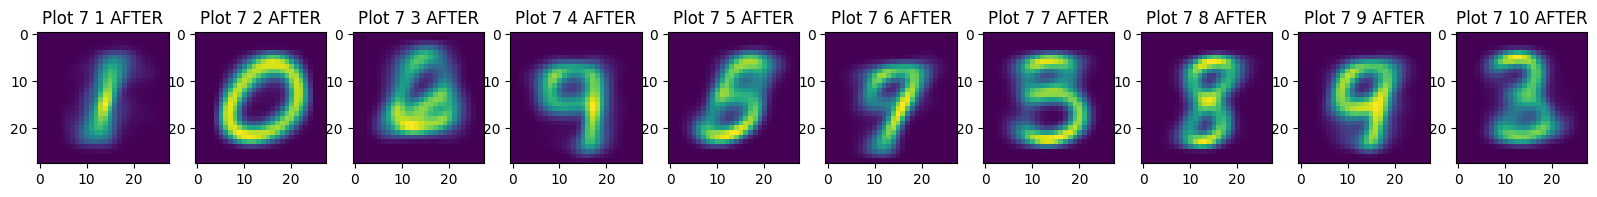

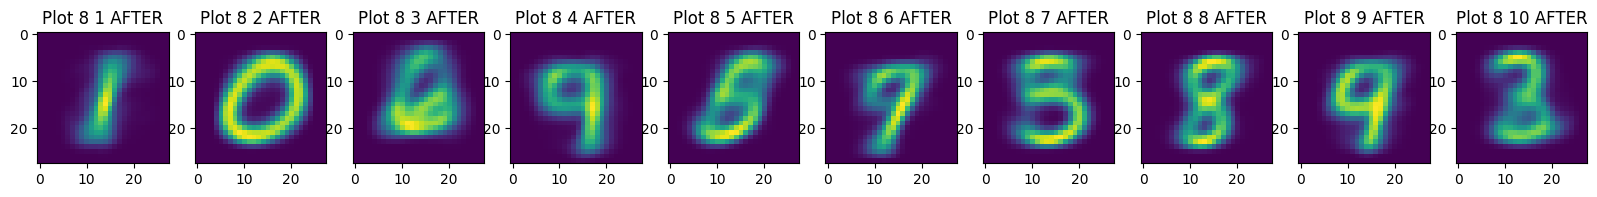

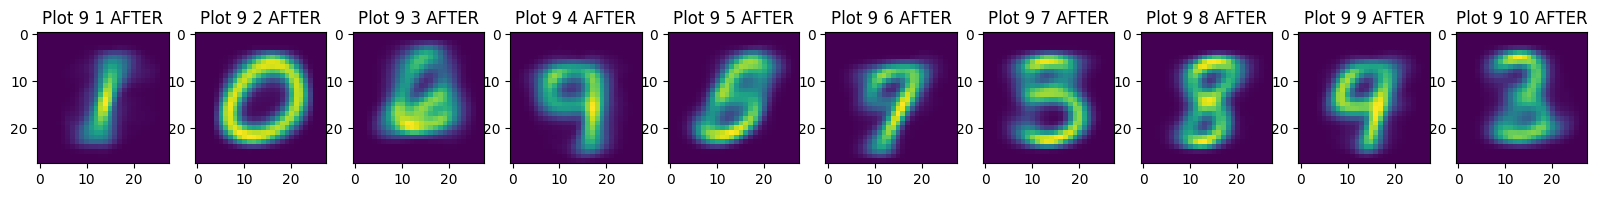

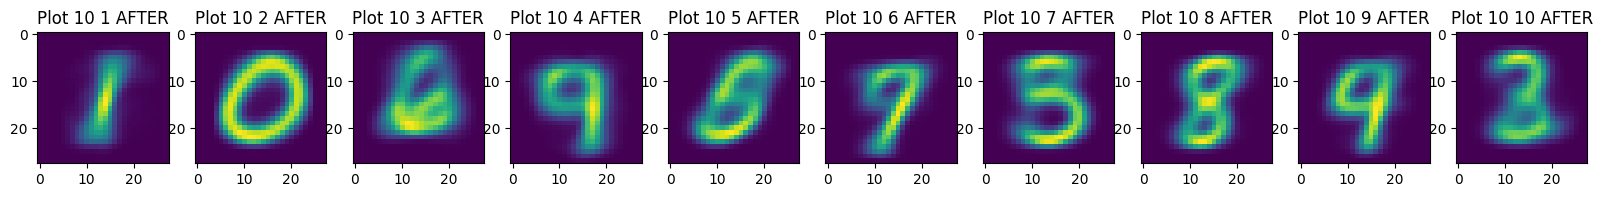

In [ ]:
tol=0.05 # experiment with this

prev_error = float("inf")
curr_error = float("inf")

N = len(x_train)
counter = 0

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
  axs[i].imshow(centroids_3[i].reshape((28,28)))
  axs[i].set_title(f'Plot {i+1} BEFORE')  # Set a title for each plot

for i in range(10):
  counter +=1
  # print("COUNTER:", counter)
  for i in range(N):
    # Calculate the distance from the data point to each centroid
    dists = [l2_dist(x_train[i], centroid) for centroid in centroids_3]
    # Assign the data point to the cluster with the nearest centroid
    assignment = dists.index(min(dists))
    cluster_assignments_3[i] = assignment

  # update centroids
  for centroid_num in range(K_3):
    new_centroids = np.array([x_train[cluster_assignments_3 == i].mean(axis=0) for i in range(K_3)])

    # Check for convergence
    # if np.all(centroids == new_centroids): break
    centroids_3 = new_centroids

  # meanerror
  meanerror = 0
  for i in range(N):
    meanerror += l2_dist(x_train[i], centroids_3[cluster_assignments_3[i]])**2
  meanerror = meanerror / len(x_train)
  curr_error = meanerror

  if abs(curr_error - prev_error) <= tol: break
  print(counter, abs(curr_error - prev_error))
  prev_error = curr_error

  # print("PLOT", centroids[0])
  # plt.imshow(centroids[0].reshape((28,28)))

  fig, axs = plt.subplots(1, 10, figsize=(20, 2))
  for i in range(10):
    axs[i].imshow(centroids_3[i].reshape((28,28)))  # Replace with your data
    axs[i].set_title(f'Plot {counter} {i+1} AFTER')  # Set a title for each plot

# Show the plot
plt.show()

# Example implementation from HW